# Predicting Wine Quality from physicochemical properties

## Import Libraries

These libraries will be used in the notebook:
- **`numpy`** is a software library for Python that contains a large collection of mathematical functions, as well as convenient data structures to represent vectors and matrices.
- **`pandas`** is a software library for Python that is designed for data manipulation and data analysis.
- **`matplotlib`** is a software libary for data visualization, which allows us to easily render various types of graphs.
- **`seaborn`** is a software library for data visualization, this builds on top of `matplotlib` and integrates with `pandas` data structures.
- **`scipy`** is a software library for scientific computing and technical computing.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# sets the theme of the charts
plt.style.use('seaborn-darkgrid')

# inline plots
%matplotlib inline
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

<ipython-input-1-1ce20f4f94ad>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

  plt.style.use('seaborn-darkgrid')


## Red Wine Quality Dataset

The dataset includes information on the red variant of vinho verde, a wine product from the Mino region of Portugal. The most common physicochemical tests were selected for analysis, where chemical components are assessed to ensure purity and the absence of harmful contaminants or residuals from the manufacturing process. The data collection process for the Red Wine Quality dataset took place from May 2004 to February 2007 and the samples were directly taken from CRVV, an authorized certification agency that  aims to improve the quality and marketing of vinho verde.

The data was collected using a computerized system called iLab, which manages the data from the wine testing from producers to laboratory and sensory analysis. As a result, every entry in the dataset corresponds to an analytical or sensory test. During the preprocessing stage, the database was transformed to include a distinct wine sample (with all tests) per row.

The data collection method used in this dataset has implications that a data-driven strategy that assesses the chemical components can be integrated for evaluating the quality of red wine, as opposed to relying solely on sensory analysis by human tasters, which can be subjective and prone to errors.


The dataset contains *1599 observations* or rows and *11 variables or columns*. In each row, this represents the data of red wine samples from the north of Portugal to model red wine quality based on physicochemical tests. Each sample includes the **`fixed acidity`**, **`volatile acidity`**, **`citric acid`**, **`residual sugar`**, **`free sulfur dioxide`**, **`total sulfur dioxide`**, **`density`**, **`pH`**, **`sulphates`**, **`alcohol`**, and its output–the **`quality`**. An individual entry on the dataset has one information each in every column. Under the given dataset from kaggle, it comprises only one file which is the `csv` file.

The following are the descriptions of each variable in the dataset.<br>

**Input variables:**
- **`fixed acidity`**
    - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- **`volatile acidity`**
    - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- **`citric acid`**
    - found in small quantities, citric acid can add 'freshness' and flavor to wines
- **`residual sugar`**
    - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- **`chlorides`**
    - the amount of salt in the wine
- **`free sulfur dioxide`**
    - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
- **`total sulfur dioxide`**
    - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
- **`density`**
    - the density of water is close to that of water depending on the percent alcohol and sugar content
- **`pH`**
    - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
- **`sulphates`**
    - a wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant
- **`alcohol`**
    - the percent alcohol content of the wine

**Output  variable (based on sensory data):**

- **`quality (score between 0 and 10)`**
    - output variable (based on sensory data, score between 0 and 10)

## Reading the Dataset

The first step is to load the dataset using `pandas`. This will load the dataset into a pandas `DataFrame`. The dataset was loaded using the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function.

In [ ]:
redwinequality_df = pd.read_csv('winequality-red.csv')
redwinequality_df.head(10).style.background_gradient(axis=None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,5
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7
9,7.500000,0.500000,0.360000,6.100000,0.071000,17.000000,102.000000,0.997800,3.350000,0.800000,10.500000,5


The dataset should now be loaded in the `redwinequality_df` variable. `redwinequality_df` is a [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). It is a data structure for storing tabular data, and the main data structure used in pandas.

In [ ]:
redwinequality_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Cleaning the Dataset

To begin with cleaning the dataset, the [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function is called to display the general information about the dataset.

In [ ]:
redwinequality_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1599 entries, 0 to 1598

Data columns (total 12 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   fixed acidity         1599 non-null   float64

 1   volatile acidity      1599 non-null   float64

 2   citric acid           1599 non-null   float64

 3   residual sugar        1599 non-null   float64

 4   chlorides             1599 non-null   float64

 5   free sulfur dioxide   1599 non-null   float64

 6   total sulfur dioxide  1599 non-null   float64

 7   density               1599 non-null   float64

 8   pH                    1599 non-null   float64

 9   sulphates             1599 non-null   float64

 10  alcohol               1599 non-null   float64

 11  quality               1599 non-null   int64  

dtypes: float64(11), int64(1)

memory usage: 150.0 KB


Based on the results of the function, it confirms that there are about **1599** observations and **12** variables in the dataset.

#### Multiple representation of same categorical values

Since all the variables are of numerical datatype, then checking of multiple representations of the same categoraical value is not needed anymore.

#### Datatype and formatting of values

It is also evident that the datatype and formatting of all the values of each variables are consistent and correct. This can be checked further by accessing the `dtypes` property of the `redwinequality_df` DataFrame.  

In [ ]:
redwinequality_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### Checking for missing data (`NaN`s)

To handle missing data in our dataset, each variable will be checked if it contains a `NaN` / `null` value. The [`isnull`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) and [`any`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) functions will be used to list each variable with a boolean value indicating if the variable contains a `NaN` / `null` value.

In [ ]:
redwinequality_df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

By looking at the resulting list, there are no missing data or variables containing `NaN`s.

#### Duplicate data

As it was stated from the source of the dataset, the data was collected using a computerized system called iLab, which manages the data from the wine testing from producers to laboratory and sensory analysis. During the preprocessing stage, the database was transformed to include a ***distinct wine sample (with all tests) per row***, which means that each row or observation in the database are unique. Thus, duplicate data in the same variable is permissible and is part of the observation to be analyzed.

#### Outliers

Outliers can be observed visually by plotting all variables except the **`quality`** variable.

<Axes: >

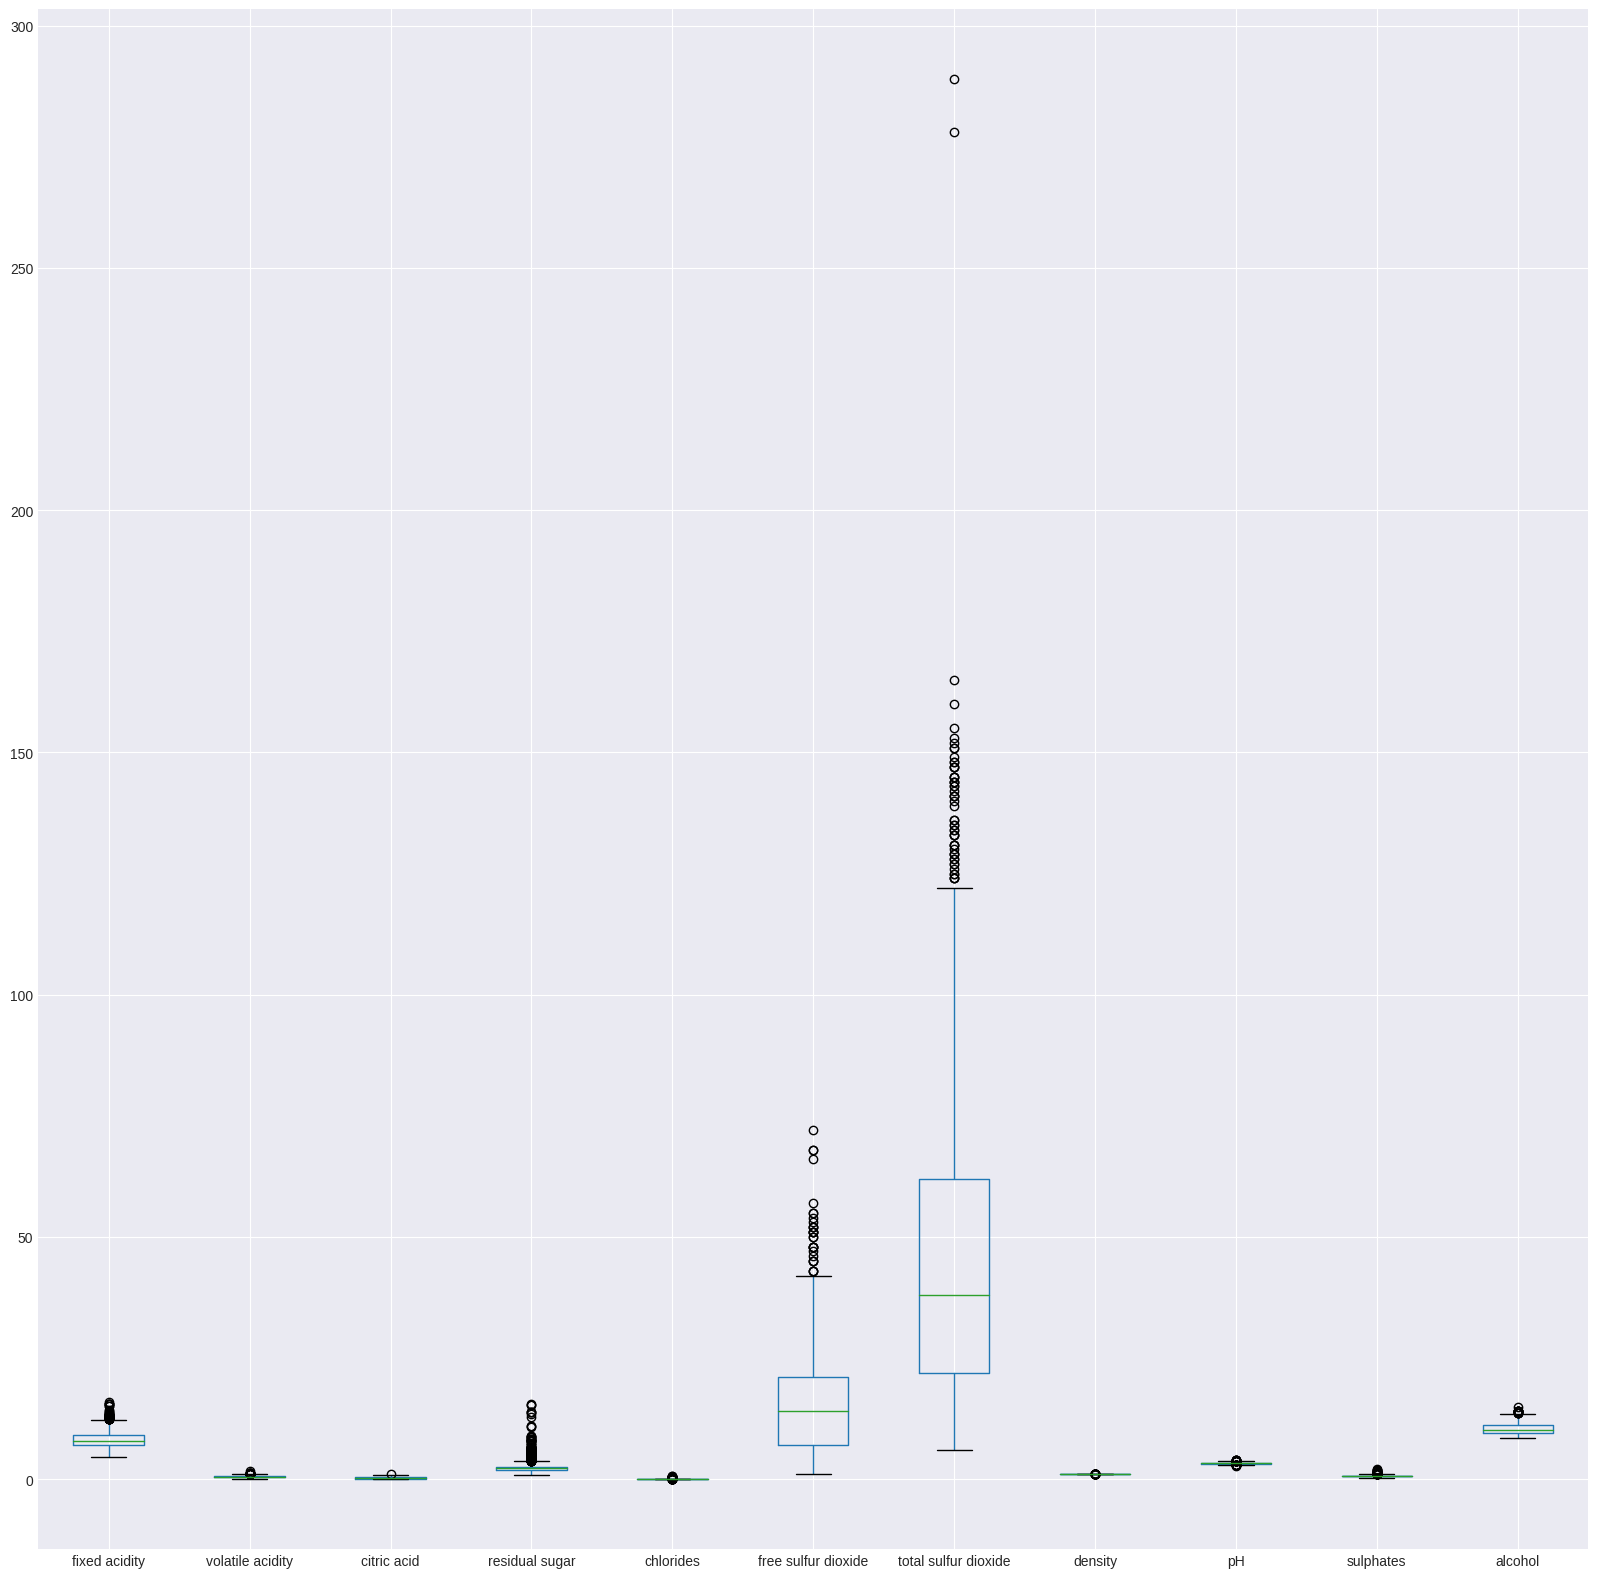

In [ ]:
to_boxplot_cols = redwinequality_df.columns.to_list()
to_boxplot_cols.remove('quality')
redwinequality_df.boxplot(column=to_boxplot_cols, figsize=(20, 20))

It can be observed in the boxplot that there are outliers for all the input variables. But based on the collection method of the dataset, which is via iLab, it is assumed that there is no error in measurement since it has been used as a measurement apparatus of our source's research. Thus, there is no need to remove all outliers found in all variables. Furthermore, it is assumed that the outliers are naturally part of each variable and it would be wrong to remove it since it will affect the statistical analysis to be done.

## Data Preprocessing

Since the outliers will not be removed in the dataset, then standardization is going to be applied to the input variables of the dataset. This will make future statistical analysis less susceptible to outliers and it will help in comparing the variables since they have different scales (i.e. standard deviation of each variable).

<Axes: >

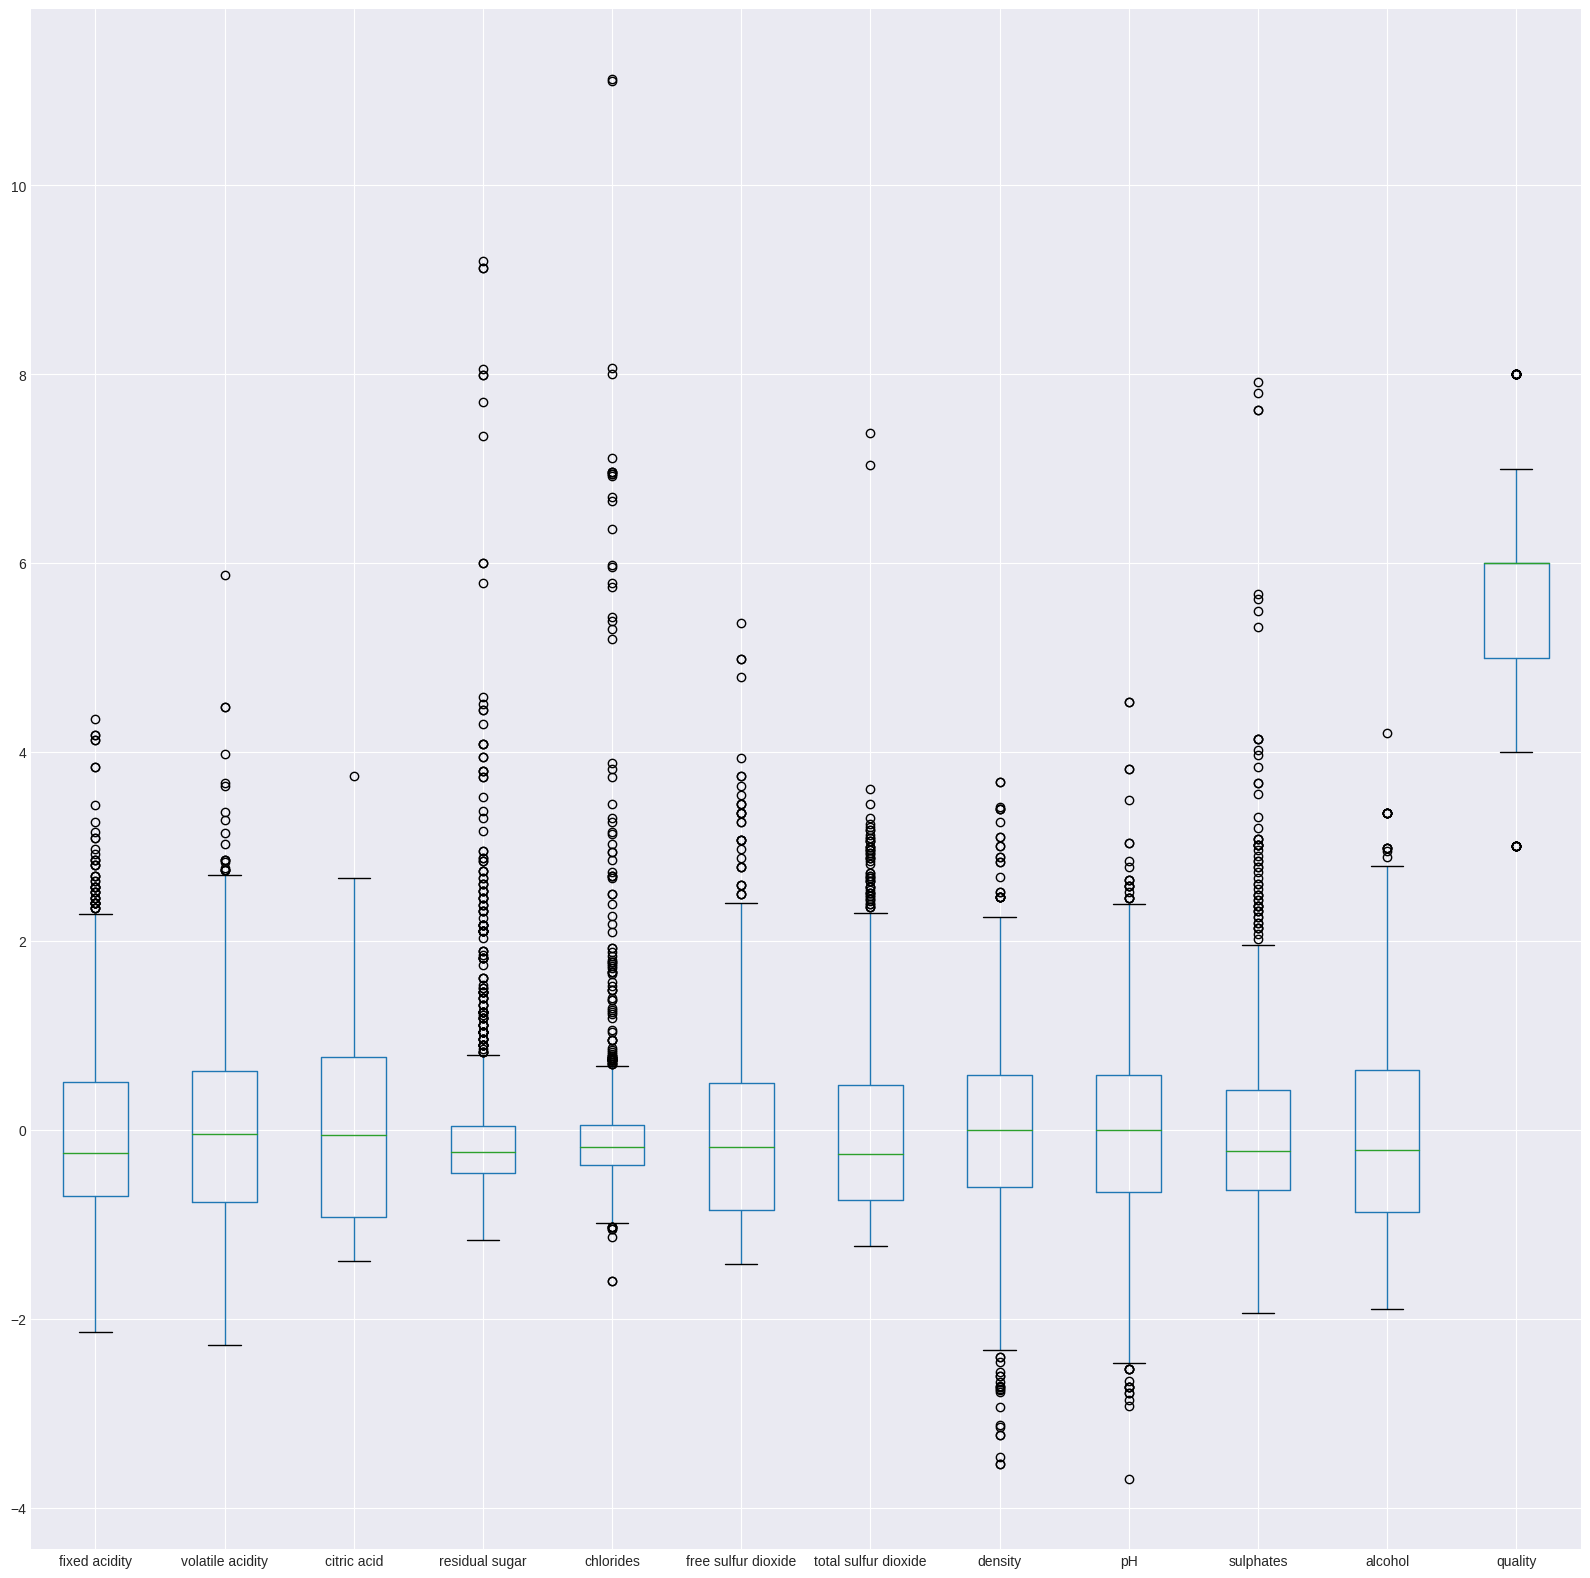

In [ ]:
# standardize each column except quality
input_vars = redwinequality_df.loc[:, redwinequality_df.columns != 'quality'] # all columns except quality
redwinequality_df_standardize = (input_vars - input_vars.mean()) / input_vars.std()
redwinequality_df_standardize['quality'] = redwinequality_df['quality']
redwinequality_df_standardize.boxplot(figsize=(20, 20))

## Exploratory Data Analysis

### 1. Is there a correlation between the quality rating and any of the physicochemical properties in the dataset?

In order to retrieve the correlation between the quality rating and the physicochemical properties in the dataset, correlation will be done to each of the variables with each other. By using the **`corr`** function, it will compute pairwaise correlation of columns.

Since the dataset only has a small range of values, then the **Pearson Correlation** method is going to be used for computing the correlation coefficient.

In [ ]:
# pearson correlation between each variable with each other
all_corr = redwinequality_df_standardize.corr(method='pearson')

# print numerical correlation values
all_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


The correlation result can be visually represented using heatmap.

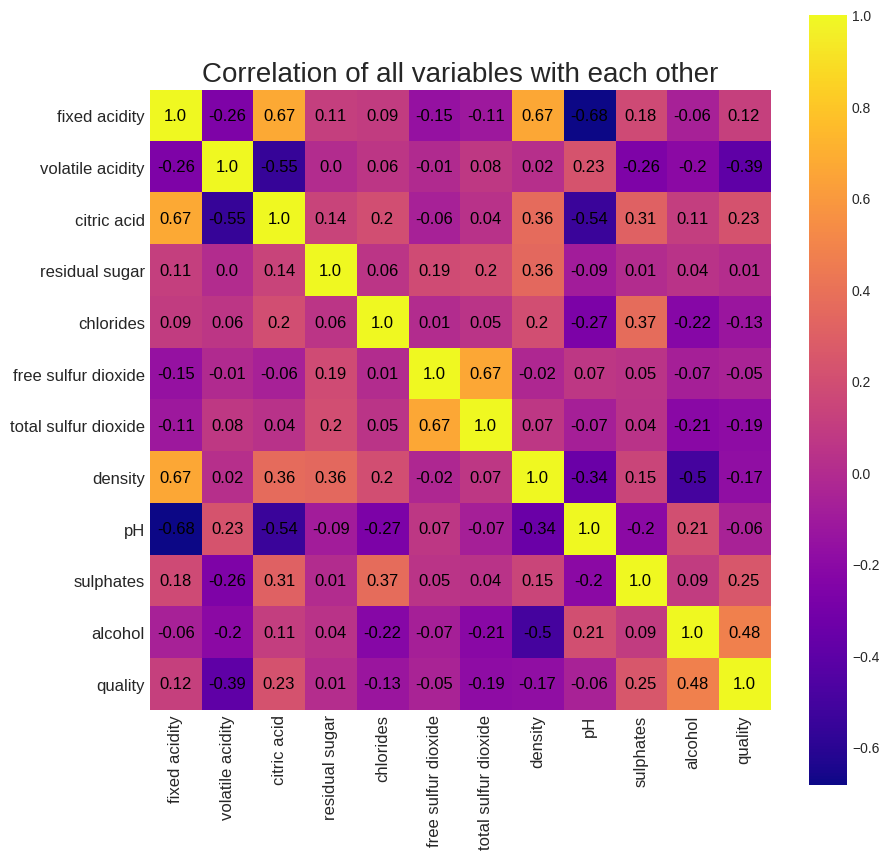

In [ ]:
# Matplotlib heatmap of correlation of each variable with each other
plt.rcParams['axes.grid'] = False # to disable white grid lines
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(all_corr, cmap='plasma', interpolation='nearest')
ax.set_title('Correlation of all variables with each other', size=20)
ax.set_xticks(range(len(all_corr.columns)), all_corr.columns, rotation='vertical', size=12)
ax.set_yticks(range(len(all_corr.columns)), all_corr.columns, size=12)
fig.colorbar(im, orientation='vertical')
for i in range(len(all_corr.columns)):
    for j in range(len(all_corr.columns)):
        text = ax.text(j, i, round(all_corr.iloc[i, j], 2),
                       ha="center", va="center", color="black", size=12)
plt.show()
plt.rcParams['axes.grid'] = True # to enable white grid lines

Since the area of interest is the correlation between the quality rating and any of the physicochemical properties in the dataset, then the quality column would be extracted from the `all_corr` dataframe.

The extracted `quality` column from the correlation dataframe will be visualized using heatmap.

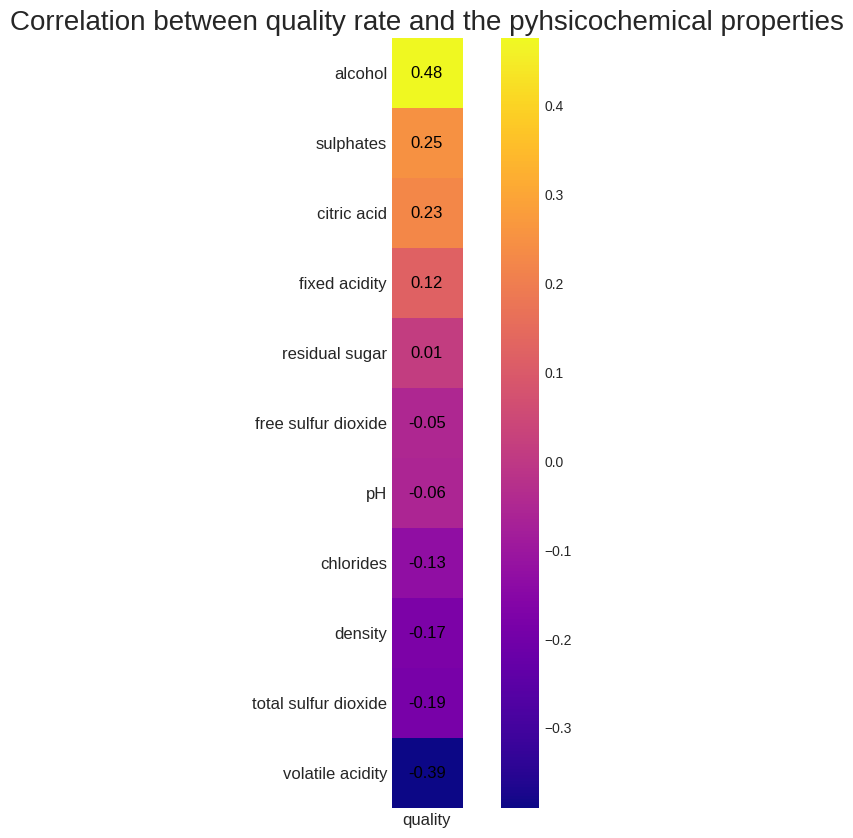

In [ ]:
# correlation between quality rate variable and the pyhsicochemical properties
quality_rest = all_corr[['quality']].drop('quality', axis=0).sort_values(by='quality', ascending=False)

quality_rest 
# quality_rest = all_corr[['quality']].sort_values(by='quality', ascending=False)

# Matplotlib heatmap of correlation between quality rate and the rest of the variables
plt.rcParams['axes.grid'] = False # to disable white grid lines
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(quality_rest, cmap='plasma', interpolation='nearest')
ax.set_title('Correlation between quality rate and the pyhsicochemical properties', size=20)
ax.set_xticks(range(len(quality_rest.columns)), quality_rest.columns, size=12)
ax.set_yticks(range(len(quality_rest.index)), quality_rest.index, size=12)
fig.colorbar(im, orientation='vertical')
for i in range(len(quality_rest.index)):
    text = ax.text(0, i, round(quality_rest.iloc[i,0], 2),
                    ha="center", va="center", color="black", size=12)
plt.show()
plt.rcParams['axes.grid'] = True # to enable white grid lines

Based on the correlation heatmap of `qualtiy rate vs. the physicochemical properties`, the **`alcohol`** physicochemical property variable yielded the relatively highest correlation value with the **`quality`** variable at **0.48**. This could possibly imply that the *quality rate* of a red wine is **positively correlated** with the amount of *alcohol content* it has.

On the opposite, the **`volatile acidity`** physicochemical property variable yielded the the relatively lowest correlation value with the **`quality`** variable at **-0.39**. This could possibly impy that the *quality rate* of a red wine is **negatively correlated** with the amount of *volatile acidity content* it has.

It is also evident that there are physicochemical properties that are close to not having a correlation (values close to **0**) with the **`quality`** variable,  such as the **`residual sugar`**, **`free sulfur dioxide`**, and **`pH`** variables. These variables might not have that much of an effect with the *quality rate* of a red wine.

### 2. How are the physicochemical properties of red wine distributed? 


The central limit theorem states that as the sample size increases, the sampling distribution of the mean approaches a normal distribution. In this case, since there are 1600 observations, we can safely assume that the sampling distribution of the mean is approximately normal. This means that we can describe the distribution of the physicochemical properties by its mean and standard deviation.

#### 2.1 Distribution of Fixed Acidity

In [ ]:
fixacid_df= redwinequality_df.agg({"fixed acidity": ["mean", "median","std", "min", "max"]})
round(fixacid_df,2)

,fixed acidity
mean,8.32
median,7.90
std,1.74
min,4.60
max,15.90


The distribution of `fixed acidity` is **8.32 ± 1.74** (mean ± std).

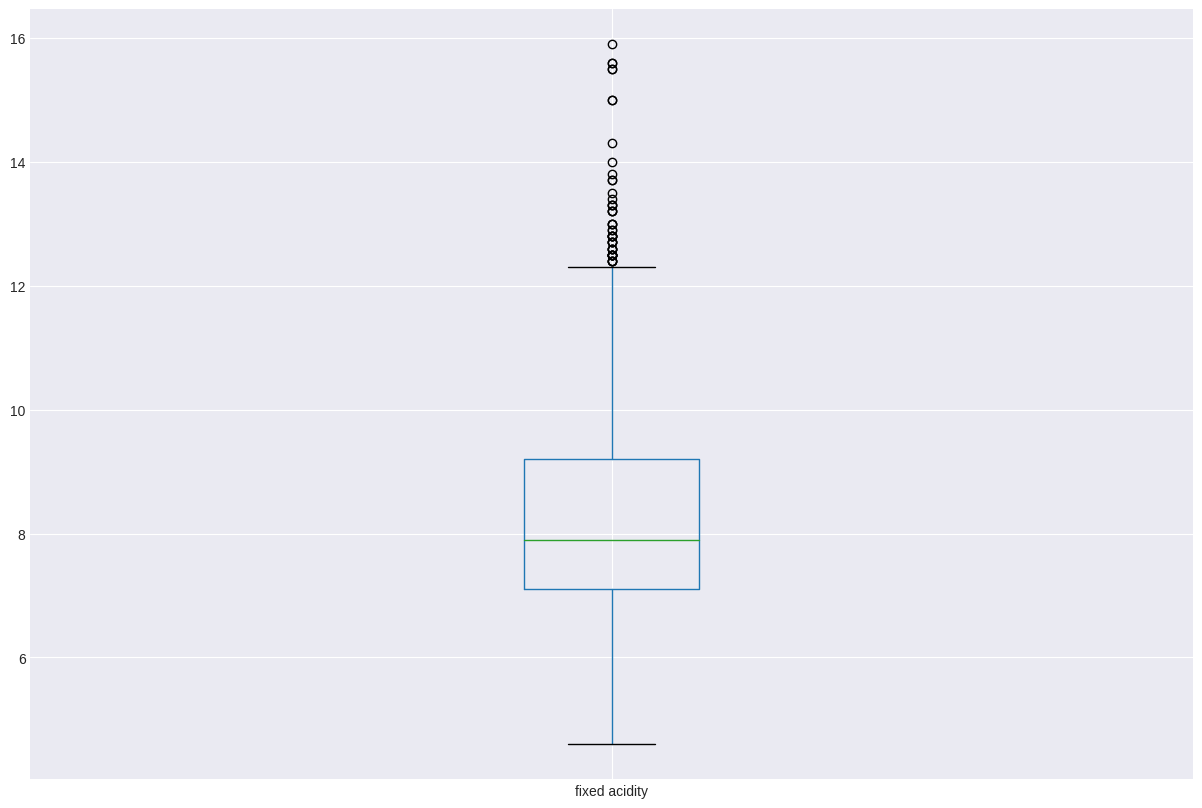

In [ ]:
redwinequality_df.boxplot("fixed acidity", figsize=(15, 10))
plt.show()

In [ ]:
# Get the median of the fixed acidity
fixacid_median = redwinequality_df["fixed acidity"].median()
fixacid_median_value = float(fixacid_median)

# Calculate the interquartile range (IQR)
fixacid_q1, fixacid_q3 = np.percentile(redwinequality_df["fixed acidity"], [25, 75])
fixacid_iqr = fixacid_q3 - fixacid_q1

# Calculate the upper and lower whiskers
fixacid_upper_whisker = min(redwinequality_df["fixed acidity"].max(), fixacid_q3 + 1.5*fixacid_iqr)
fixacid_lower_whisker = max(redwinequality_df["fixed acidity"].min(),fixacid_q1 - 1.5*fixacid_iqr)

#Calculate center of the box for visual inspection
fixacid_center=(fixacid_q3 +fixacid_q1)/2

#Print values 
print("Median of fixed acidity: {:.2f}".format(fixacid_median_value))
print("Third Quartile: {:.2f}".format(fixacid_q3))
print("First Quartile: {:.2f}".format(fixacid_q1))
print("Upper whisker: {:.2f}".format(fixacid_upper_whisker))
print("Lower whisker: {:.2f}".format(fixacid_lower_whisker))
print("Center of the box: {:.2f}".format(fixacid_center))

Median of fixed acidity: 7.90

Third Quartile: 9.20

First Quartile: 7.10

Upper whisker: 12.35

Lower whisker: 4.60

Center of the box: 8.15


Based on the boxplot of `fixed acidity`, it can be seen that there exists outliers outside the upper whisker (12.35); however, none below the lower whisker (4.60). The 'fixed acidity' column has a typical range of values, also known as the middle 50% of the data, which falls between 7.10 and 9.20.

Moreover, based on visual inspection, the median falls to the bottom of the center of the box; thus, the **distribution is positively skewed**.

#### 2.2 Distribution of Volatile Acidity

In [ ]:
volacid_df=redwinequality_df.agg({"volatile acidity": ["mean", "median","std", "min", "max"]})
round(volacid_df,2)

,volatile acidity
mean,0.53
median,0.52
std,0.18
min,0.12
max,1.58


The distribution of volatile acidity is **0.53 ± 0.18** (mean ± std).

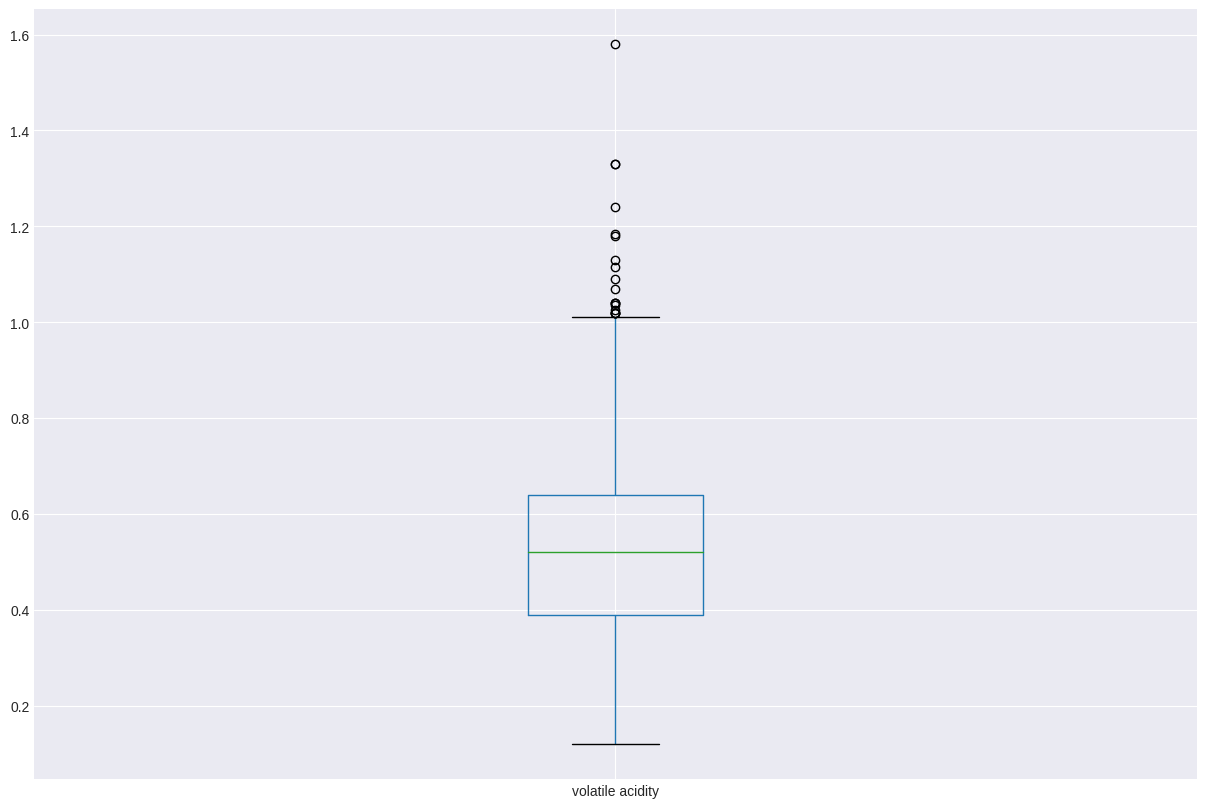

In [ ]:
redwinequality_df.boxplot("volatile acidity", figsize=(15, 10))
plt.show()

In [ ]:
# Get the median of the volatile acidity
volacid_median = redwinequality_df["volatile acidity"].median()
volacid_median_value = float(volacid_median)

# Calculate the interquartile range (IQR)
volacid_q1, volacid_q3 = np.percentile(redwinequality_df["volatile acidity"], [25, 75])
volacid_iqr = volacid_q3 - volacid_q1

# Calculate the upper and lower whiskers
volacid_upper_whisker = min(redwinequality_df["volatile acidity"].max(), volacid_q3 + 1.5*volacid_iqr)
volacid_lower_whisker = max(redwinequality_df["volatile acidity"].min(),volacid_q1 - 1.5*volacid_iqr)

#Calculate center of the box for visual inspection
volacid_center=(volacid_q3 +volacid_q1)/2

#Print values 
print("Median of volatile acidity: {:.2f}".format(volacid_median_value))
print("Third Quartile: {:.2f}".format(volacid_q3))
print("First Quartile: {:.2f}".format(volacid_q1))
print("Upper whisker: {:.2f}".format(volacid_upper_whisker))
print("Lower whisker: {:.2f}".format(volacid_lower_whisker))
print("Center of the box: {:.2f}".format(volacid_center))

Median of volatile acidity: 0.52

Third Quartile: 0.64

First Quartile: 0.39

Upper whisker: 1.02

Lower whisker: 0.12

Center of the box: 0.52


Based on the boxplot of `volatile acidity`, it can be seen that there exists outliers outside the upper whisker (1.02); however, none below the lower whisker (0.12). The 'volatile acidity' column has a typical range of values, also known as the middle 50% of the data, which falls between 0.39 and 0.64.

Moreover, based on visual inspection, the median falls on the center of the box; thus, the **distribution is symmetric**.

#### 2.3 Distribution of Citric Acid

In [ ]:
citricacid_df= redwinequality_df.agg({"citric acid": ["mean", "median","std", "min", "max"]})
round(citricacid_df,2)

,citric acid
mean,0.27
median,0.26
std,0.19
min,0.00
max,1.00


The distribution of citric acid is **0.27 ± 0.19** (mean ± std).

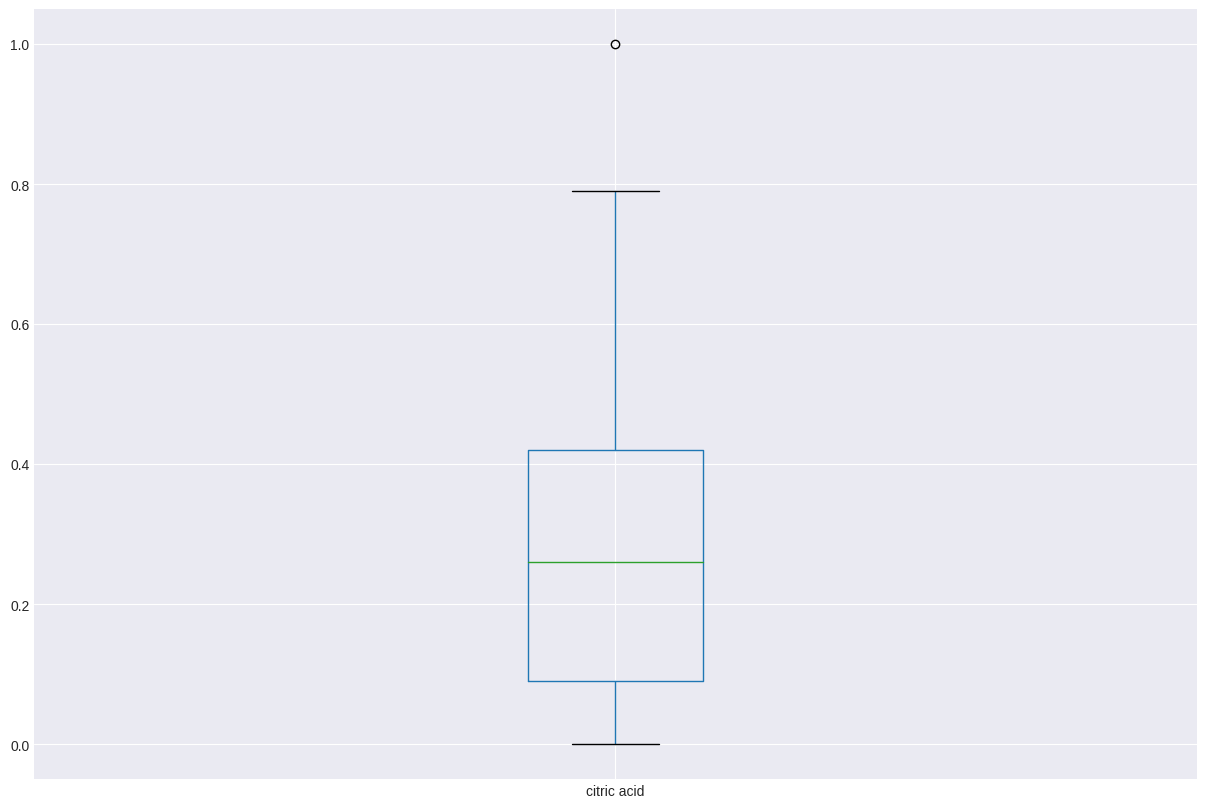

In [ ]:
redwinequality_df.boxplot("citric acid", figsize=(15, 10))
plt.show()

In [ ]:
# Get the median of the citric acidity
citricacid_median = redwinequality_df["citric acid"].median()
citricacid_median_value = float(citricacid_median)

# Calculate the interquartile range (IQR)
citricacid_q1, citricacid_q3 = np.percentile(redwinequality_df["citric acid"], [25, 75])
citricacid_iqr = citricacid_q3 - citricacid_q1

# Calculate the upper and lower whiskers
citricacid_upper_whisker = min(redwinequality_df["citric acid"].max(), citricacid_q3 + 1.5*citricacid_iqr)
citricacid_lower_whisker = max(redwinequality_df["citric acid"].min(),citricacid_q1 - 1.5*citricacid_iqr)

# Calculate center of the box for visual inspection
citricacid_center = (citricacid_q3 + citricacid_q1)/2

# Print values 
print("Median of citric acid: {:.2f}".format(citricacid_median_value))
print("Third Quartile: {:.2f}".format(citricacid_q3))
print("First Quartile: {:.2f}".format(citricacid_q1))
print("Upper whisker: {:.2f}".format(citricacid_upper_whisker))
print("Lower whisker: {:.2f}".format(citricacid_lower_whisker))
print("Center of the box: {:.2f}".format(citricacid_center))

round(redwinequality_df[['citric acid']].describe(),2)


Median of citric acid: 0.26

Third Quartile: 0.42

First Quartile: 0.09

Upper whisker: 0.91

Lower whisker: 0.00

Center of the box: 0.26


,citric acid
count,1599.00
mean,0.27
std,0.19
min,0.00
25%,0.09
50%,0.26
75%,0.42
max,1.00


Based on the boxplot of `citric acid`, it can be seen that there exists outliers outside the upper whisker (0.91); however, none below the lower whisker (0.00). The 'citric acid' column has a typical range of values, also known as the middle 50% of the data, which falls between 0.09 and 0.42.

Moreover, based on visual inspection, the median falls on the center of the box; thus, the **distribution is symmetric**.

#### 2.4 Distribution of Residual Sugars

In [ ]:
sugar_df= redwinequality_df.agg({"residual sugar": ["mean", "median","std", "min", "max"]})
round(sugar_df,2)

,residual sugar
mean,2.54
median,2.20
std,1.41
min,0.90
max,15.50


The distribution of residual sugar is **2.54 ± 1.41** (mean ± std).

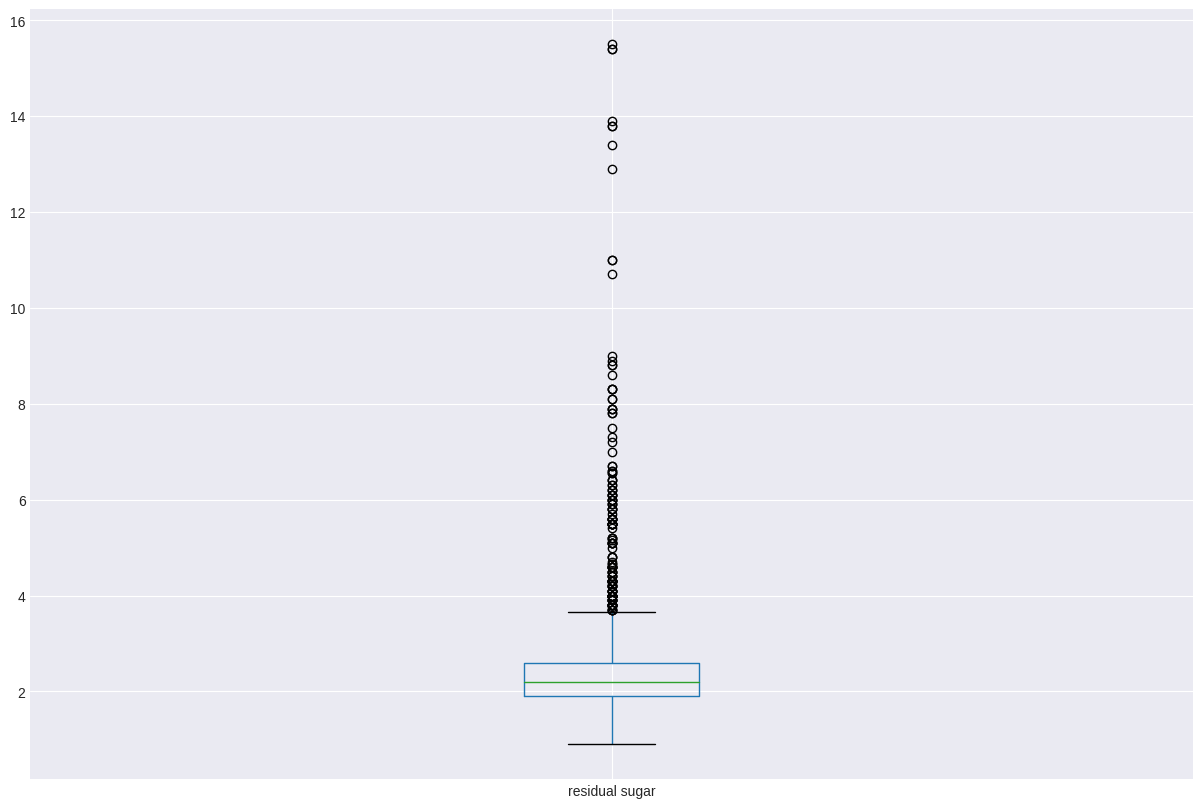

In [ ]:
redwinequality_df.boxplot("residual sugar", figsize=(15, 10))
plt.show()

In [ ]:
# Get the median of the residual sugar
sugar_median = redwinequality_df["residual sugar"].median()
sugar_median_value = float(sugar_median)

# Calculate the interquartile range (IQR)
sugar_q1, sugar_q3 = np.percentile(redwinequality_df["residual sugar"], [25, 75])
sugar_iqr = sugar_q3 - sugar_q1

# Calculate the upper and lower whiskers
sugar_upper_whisker = min(redwinequality_df["residual sugar"].max(), sugar_q3 + 1.5*sugar_iqr)
sugar_lower_whisker = max(redwinequality_df["residual sugar"].min(),sugar_q1 - 1.5*sugar_iqr)

#Calculate center of the box for visual inspection
sugar_center=(sugar_q3 +sugar_q1)/2

#Print values 
print("Median of residual sugar: {:.2f}".format(sugar_median_value))
print("Third Quartile: {:.2f}".format(sugar_q3))
print("First Quartile: {:.2f}".format(sugar_q1))
print("Upper whisker: {:.2f}".format(sugar_upper_whisker))
print("Lower whisker: {:.2f}".format(sugar_lower_whisker))
print("Center of the box: {:.2f}".format(sugar_center))

Median of residual sugar: 2.20

Third Quartile: 2.60

First Quartile: 1.90

Upper whisker: 3.65

Lower whisker: 0.90

Center of the box: 2.25


Based on the boxplot of `residual sugar`, it can be seen that there exists outliers outside the upper whisker (3.65); however, none below the lower whisker (0.90). The 'residual sugar' column has a typical range of values, also known as the middle 50% of the data, which falls between 1.90 and 2.60.

Moreover, based on visual inspection, the median is near the center of the box; thus, the **distribution is approximately symmetric**.

#### 2.5 Distribution of Chlorides

In [ ]:
chloride_df= redwinequality_df.agg({"chlorides": ["mean", "median","std", "min", "max"]})
round(chloride_df,2)

,chlorides
mean,0.09
median,0.08
std,0.05
min,0.01
max,0.61


The distribution of chlorides is **0.09 ± 0.05** (mean ± std).

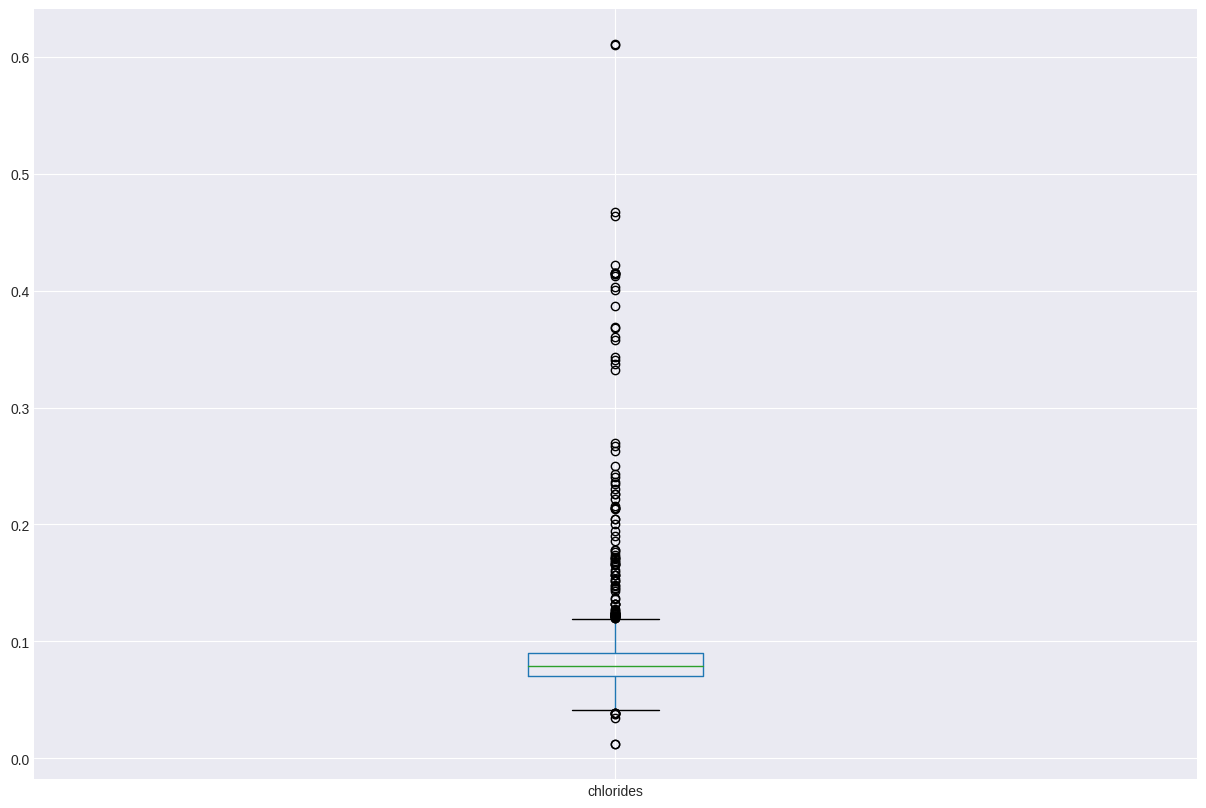

In [ ]:
redwinequality_df.boxplot("chlorides", figsize=(15, 10))
plt.show()

In [ ]:
# Get the median of the chlorides
chloride_median = redwinequality_df["chlorides"].median()
chloride_median_value = float(chloride_median)

# Calculate the interquartile range (IQR)
chloride_q1, chloride_q3 = np.percentile(redwinequality_df["chlorides"], [25, 75])
chloride_iqr = chloride_q3 - chloride_q1

# Calculate the upper and lower whiskers
chloride_upper_whisker = min(redwinequality_df["chlorides"].max(), chloride_q3 + 1.5*chloride_iqr)
chloride_lower_whisker = max(redwinequality_df["chlorides"].min(),chloride_q1 - 1.5*chloride_iqr)

#Calculate center of the box for visual inspection
chloride_center=(chloride_q3 +chloride_q1)/2

#Print values 
print("Median of chlorides: {:.2f}".format(chloride_median_value))
print("Third Quartile: {:.2f}".format(chloride_q3))
print("First Quartile: {:.2f}".format(chloride_q1))
print("Upper whisker: {:.2f}".format(chloride_upper_whisker))
print("Lower whisker: {:.2f}".format(chloride_lower_whisker))
print("Center of the box: {:.2f}".format(chloride_center))

Median of chlorides: 0.08

Third Quartile: 0.09

First Quartile: 0.07

Upper whisker: 0.12

Lower whisker: 0.04

Center of the box: 0.08


Based on the boxplot of `chlorides`, it can be seen that there exists outliers outside the upper whisker (0.12) and lower whisker (0.04). The 'chlorides' column has a typical range of values, also known as the middle 50% of the data, which falls between 0.07 and 0.09.

Moreover, based on visual inspection, the median is at the center of the box; thus, the **distribution is symmetric**.

#### 2.6 Distribution of free sulfur dioxide

In [ ]:
free_sd_df= redwinequality_df.agg({"free sulfur dioxide": ["mean", "median","std", "min", "max"]})
round(free_sd_df,2)

,free sulfur dioxide
mean,15.87
median,14.00
std,10.46
min,1.00
max,72.00


The distribution of chlorides is **15.87 ± 10.46** (mean ± std).

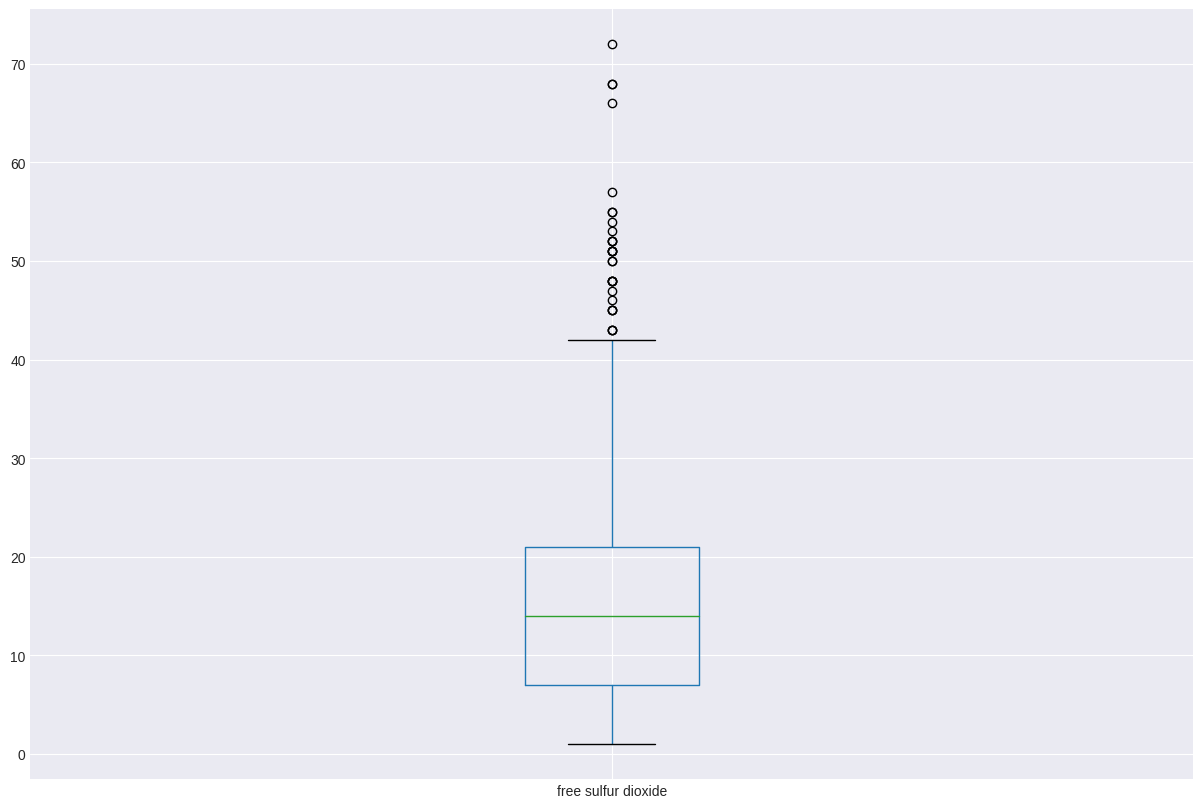

In [ ]:
redwinequality_df.boxplot("free sulfur dioxide", figsize=(15, 10))
plt.show()

In [ ]:
# Get the median of the free sulfur dioxide
free_sd_median = redwinequality_df["free sulfur dioxide"].median()
free_sd_median_value = float(free_sd_median)

# Calculate the interquartile range (IQR)
free_sd_q1, free_sd_q3 = np.percentile(redwinequality_df["free sulfur dioxide"], [25, 75])
free_sd_iqr = free_sd_q3 - free_sd_q1

# Calculate the upper and lower whiskers
free_sd_upper_whisker = min(redwinequality_df["free sulfur dioxide"].max(), free_sd_q3 + 1.5*free_sd_iqr)
free_sd_lower_whisker = max(redwinequality_df["free sulfur dioxide"].min(),free_sd_q1 - 1.5*free_sd_iqr)

#Calculate center of the box for visual inspection
free_sd_center=(free_sd_q3 +free_sd_q1)/2

#Print values 
print("Median of free sulfur dioxide: {:.2f}".format(free_sd_median_value))
print("Third Quartile: {:.2f}".format(free_sd_q3))
print("First Quartile: {:.2f}".format(free_sd_q1))
print("Upper whisker: {:.2f}".format(free_sd_upper_whisker))
print("Lower whisker: {:.2f}".format(free_sd_lower_whisker))
print("Center of the box: {:.2f}".format(free_sd_center))

Median of free sulfur dioxide: 14.00

Third Quartile: 21.00

First Quartile: 7.00

Upper whisker: 42.00

Lower whisker: 1.00

Center of the box: 14.00


Based on the boxplot of `free sulfur dioxide`, it can be seen that there exists outliers outside the upper whisker (42.00); however, none below the lower whisker (1.00). The 'free sulfur dioxide' column has a typical range of values, also known as the middle 50% of the data, which falls between 7.00 and 21.00.

Moreover, based on visual inspection, the median is at the center of the box; thus, the **distribution is symmetric**.

#### 2.7 Distribution of total sulfur dioxide

In [ ]:
total_sd_df= redwinequality_df.agg({"total sulfur dioxide": ["mean", "median","std", "min", "max"]})
round(total_sd_df,2)

,total sulfur dioxide
mean,46.47
median,38.00
std,32.90
min,6.00
max,289.00


The distribution of total sulfur dioxide is **46.47 ± 32.90** (mean ± std).

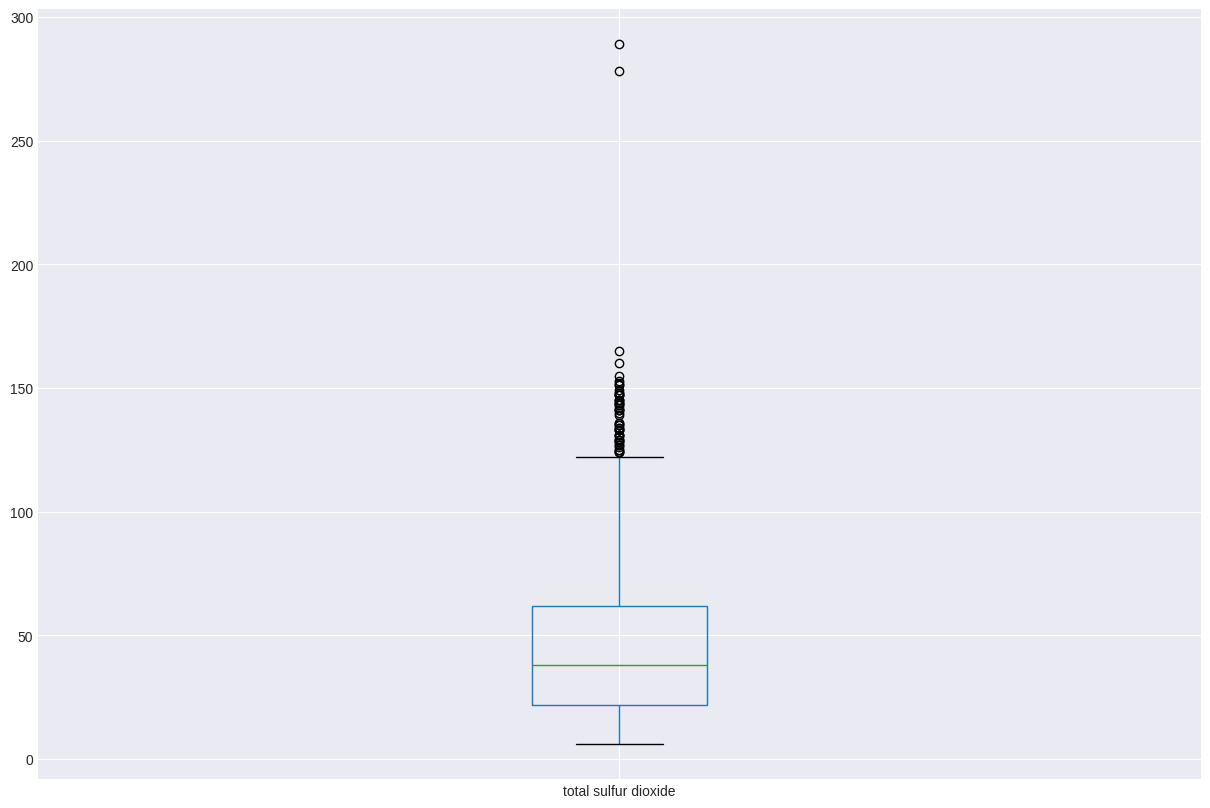

In [ ]:
redwinequality_df.boxplot("total sulfur dioxide", figsize=(15, 10))
plt.show()

In [ ]:
# Get the median of the total sulfur dioxide
total_sd_median = redwinequality_df["total sulfur dioxide"].median()
total_sd_median_value = float(total_sd_median)

# Calculate the interquartile range (IQR)
total_sd_q1, total_sd_q3 = np.percentile(redwinequality_df["total sulfur dioxide"], [25, 75])
total_sd_iqr = total_sd_q3 - total_sd_q1

# Calculate the upper and lower whiskers
total_sd_upper_whisker = min(redwinequality_df["total sulfur dioxide"].max(), total_sd_q3 + 1.5*total_sd_iqr)
total_sd_lower_whisker = max(redwinequality_df["total sulfur dioxide"].min(),total_sd_q1 - 1.5*total_sd_iqr)

#Calculate center of the box for visual inspection
total_sd_center=(total_sd_q3 +total_sd_q1)/2

#Print values 
print("Median of total sulfur dioxide: {:.2f}".format(total_sd_median_value))
print("Third Quartile: {:.2f}".format(total_sd_q3))
print("First Quartile: {:.2f}".format(total_sd_q1))
print("Upper whisker: {:.2f}".format(total_sd_upper_whisker))
print("Lower whisker: {:.2f}".format(total_sd_lower_whisker))
print("Center of the box: {:.2f}".format(total_sd_center))

Median of total sulfur dioxide: 38.00

Third Quartile: 62.00

First Quartile: 22.00

Upper whisker: 122.00

Lower whisker: 6.00

Center of the box: 42.00


Based on the boxplot of `total sulfur dioxide`, it can be seen that there exists outliers outside the upper whisker (122.00); however, none below the lower whisker (6.00). The 'total sulfur dioxider' column has a typical range of values, also known as the middle 50% of the data, which falls between 22.00 and 122.00.

Moreover, based on visual inspection, the median is near the center of the box; thus, the **distribution is approximately symmetric**.

#### 2.8 Distribution of Density

In [ ]:
density_df= redwinequality_df.agg({"density": ["mean", "median","std", "min", "max"]})
round(density_df,4)

,density
mean,0.9967
median,0.9968
std,0.0019
min,0.9901
max,1.0037


The distribution of density is **0.9967 ± 0.0019** (mean ± std).

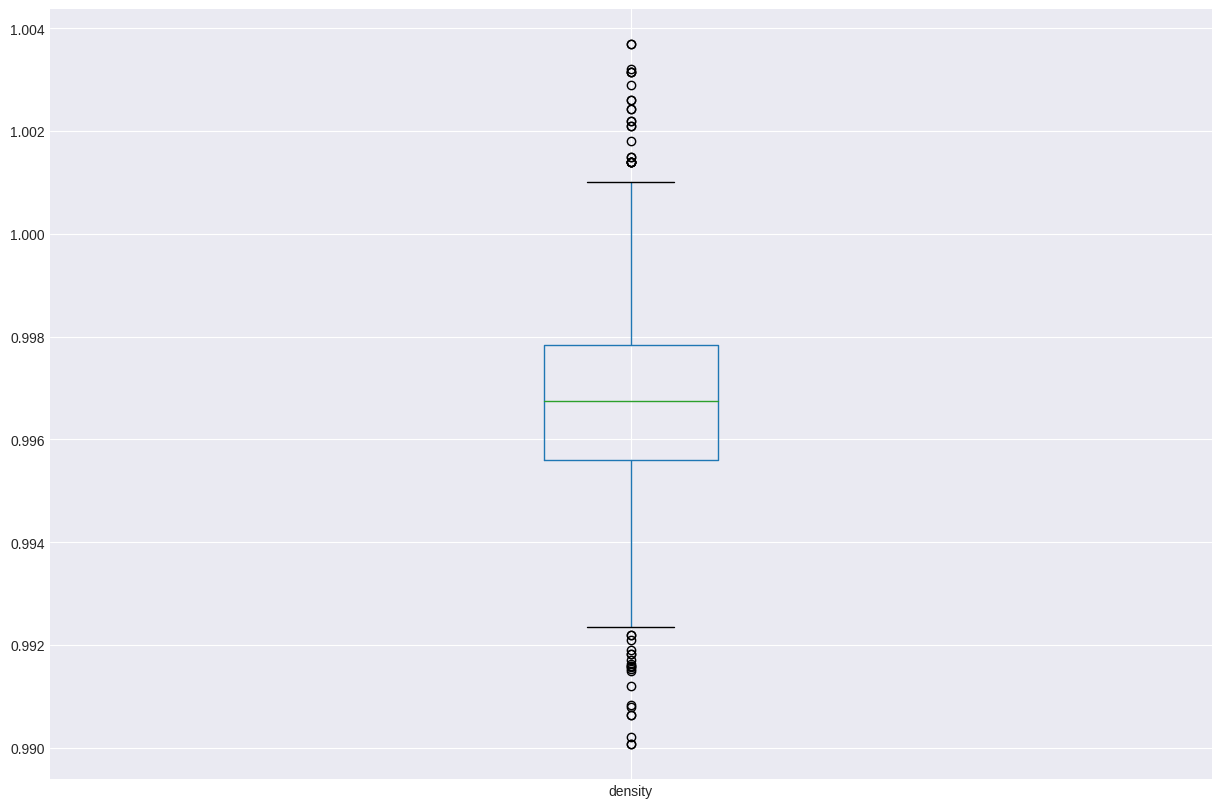

In [ ]:
redwinequality_df.boxplot("density", figsize=(15, 10))
plt.show()

In [ ]:
# Get the median of the density
density_median = redwinequality_df["density"].median()
density_median_value = float(density_median)

# Calculate the interquartile range (IQR)
density_q1, density_q3 = np.percentile(redwinequality_df["density"], [25, 75])
density_iqr = density_q3 - density_q1

# Calculate the upper and lower whiskers
density_upper_whisker = min(redwinequality_df["density"].max(), density_q3 + 1.5*density_iqr)
density_lower_whisker = max(redwinequality_df["density"].min(),density_q1 - 1.5*density_iqr)

#Calculate center of the box for visual inspection
density_center=(density_q3 +density_q1)/2

#Print values 
print("Median of density: {:.4f}".format(density_median_value))
print("Third Quartile: {:.4f}".format(density_q3))
print("First Quartile: {:.4f}".format(density_q1))
print("Upper whisker: {:.4f}".format(density_upper_whisker))
print("Lower whisker: {:.4f}".format(density_lower_whisker))
print("Center of the box: {:.4f}".format(density_center))

Median of density: 0.9968

Third Quartile: 0.9978

First Quartile: 0.9956

Upper whisker: 1.0012

Lower whisker: 0.9922

Center of the box: 0.9967


Based on the boxplot of density, it can be seen that there exists outliers outside the upper whisker (1.0012) and lower whisker (0.9922). The 'density' column has a typical range of values, also known as the middle 50% of the data, which falls between 0.9956 and 0.9978.

Moreover, based on visual inspection, the median is near the center of the box; thus, the **distribution is approximately symmetric**.

#### 2.9 Distribution of pH

In [ ]:
ph_df = redwinequality_df.agg({"pH": ["mean", "median","std", "min", "max"]})
round(ph_df,2)

,pH
mean,3.31
median,3.31
std,0.15
min,2.74
max,4.01


The distribution of density is **3.31 ± 0.15** (mean ± std).

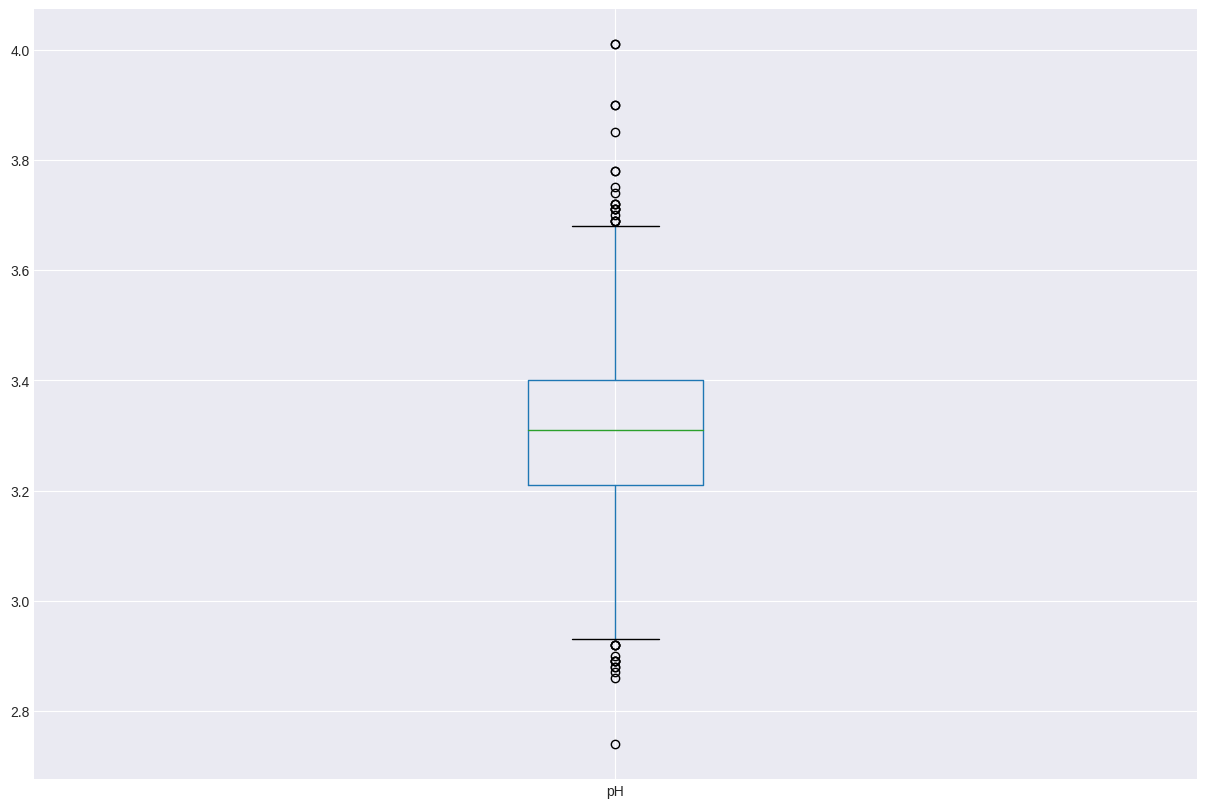

In [ ]:
redwinequality_df.boxplot("pH", figsize=(15, 10))
plt.show()

In [ ]:
# Get the median of the pH
ph_median = redwinequality_df["pH"].median()
ph_median_value = float(ph_median)

# Calculate the interquartile range (IQR)
ph_q1, ph_q3 = np.percentile(redwinequality_df["pH"], [25, 75])
ph_iqr = ph_q3 - ph_q1

# Calculate the upper and lower whiskers
ph_upper_whisker = min(redwinequality_df["pH"].max(), ph_q3 + 1.5*ph_iqr)
ph_lower_whisker = max(redwinequality_df["pH"].min(),ph_q1 - 1.5*ph_iqr)

#Calculate center of the box for visual inspection
ph_center=(ph_q3 +ph_q1)/2

#Print values 
print("Median of pH: {:.2f}".format(ph_median_value))
print("Third Quartile: {:.2f}".format(ph_q3))
print("First Quartile: {:.2f}".format(ph_q1))
print("Upper whisker: {:.2f}".format(ph_upper_whisker))
print("Lower whisker: {:.2f}".format(ph_lower_whisker))
print("Center of the box: {:.2f}".format(ph_center))

Median of pH: 3.31

Third Quartile: 3.40

First Quartile: 3.21

Upper whisker: 3.68

Lower whisker: 2.92

Center of the box: 3.30


Based on the boxplot of `pH`, it can be seen that there exists outliers outside the upper whisker (3.68) and lower whisker (2.92). The 'pH' column has a typical range of values, also known as the middle 50% of the data, which falls between 3.21 and 3.40.

Moreover, based on visual inspection, the median is near the center of the box; thus, the **distribution is approximately symmetric**.

#### 2.10 Distribution of sulphates

In [ ]:
sulph_df = redwinequality_df.agg({"sulphates": ["mean", "median","std", "min", "max"]})
round(sulph_df,2)

,sulphates
mean,0.66
median,0.62
std,0.17
min,0.33
max,2.00


The distribution of sulphates is **0.66 ± 0.17** (mean ± std).

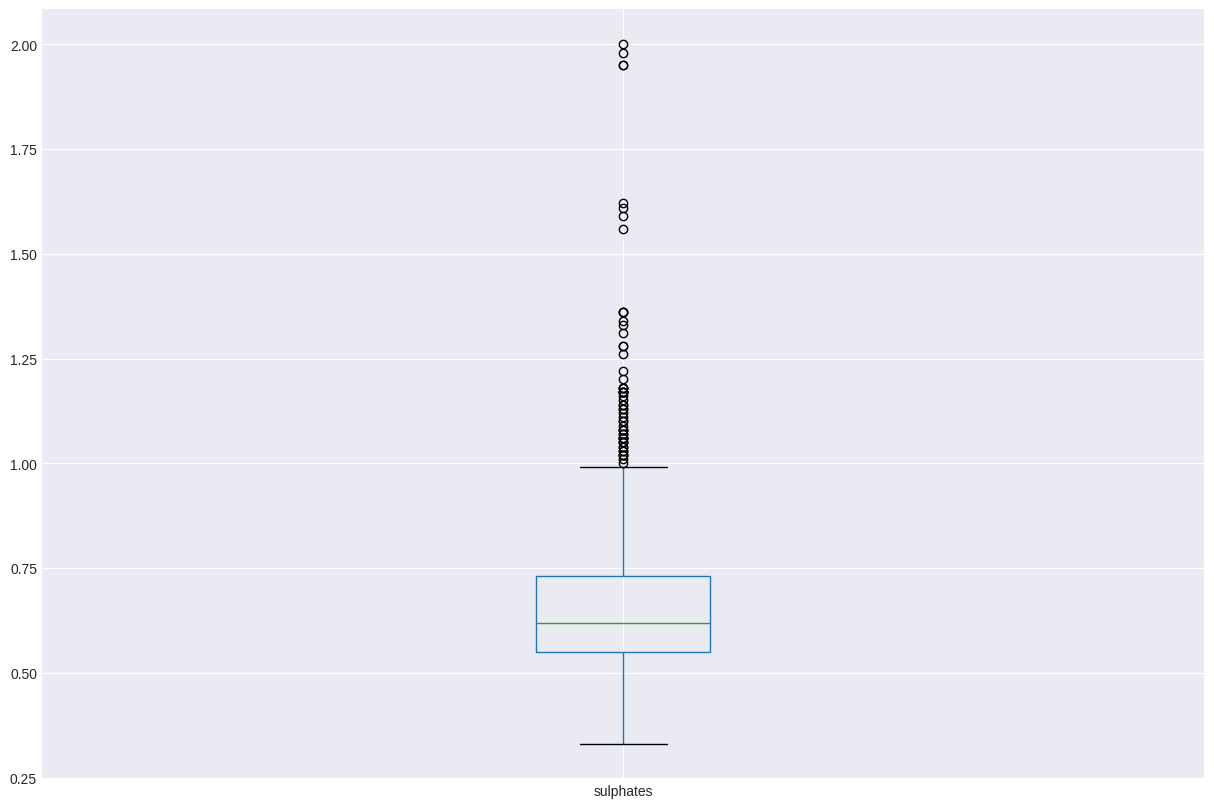

In [ ]:
redwinequality_df.boxplot("sulphates", figsize=(15, 10))
plt.show()

In [ ]:
# Get the median of the sulphates
sulph_median = redwinequality_df["sulphates"].median()
sulph_median_value = float(sulph_median)

# Calculate the interquartile range (IQR)
sulph_q1, sulph_q3 = np.percentile(redwinequality_df["sulphates"], [25, 75])
sulph_iqr = sulph_q3 - sulph_q1

# Calculate the upper and lower whiskers
sulph_upper_whisker = min(redwinequality_df["sulphates"].max(), sulph_q3 + 1.5*sulph_iqr)
sulph_lower_whisker = max(redwinequality_df["sulphates"].min(),sulph_q1 - 1.5*sulph_iqr)

#Calculate center of the box for visual inspection
sulph_center=(sulph_q3 +sulph_q1)/2

#Print values 
print("Median of sulphates: {:.2f}".format(sulph_median_value))
print("Third Quartile: {:.2f}".format(sulph_q3))
print("First Quartile: {:.2f}".format(sulph_q1))
print("Upper whisker: {:.2f}".format(sulph_upper_whisker))
print("Lower whisker: {:.2f}".format(sulph_lower_whisker))
print("Center of the box: {:.2f}".format(sulph_center))

Median of sulphates: 0.62

Third Quartile: 0.73

First Quartile: 0.55

Upper whisker: 1.00

Lower whisker: 0.33

Center of the box: 0.64


Based on the boxplot of `sulphates`, it can be seen that there exists outliers outside the upper whisker (1.00); however, none below the lower whisker (0.33). The 'sulphates' column has a typical range of values, also known as the middle 50% of the data, which falls between 0.55 and 0.73.

Moreover, based on visual inspection, the median is near the center of the box; thus, the **distribution is approximately symmetric**.

#### 2.11 Distribution of alcohol

In [ ]:
alc_df = redwinequality_df.agg({"alcohol": ["mean", "median","std", "min", "max"]})
round(alc_df,2)

,alcohol
mean,10.42
median,10.20
std,1.07
min,8.40
max,14.90


The distribution of alcohol is 10.42 ± 1.07 (mean ± std).

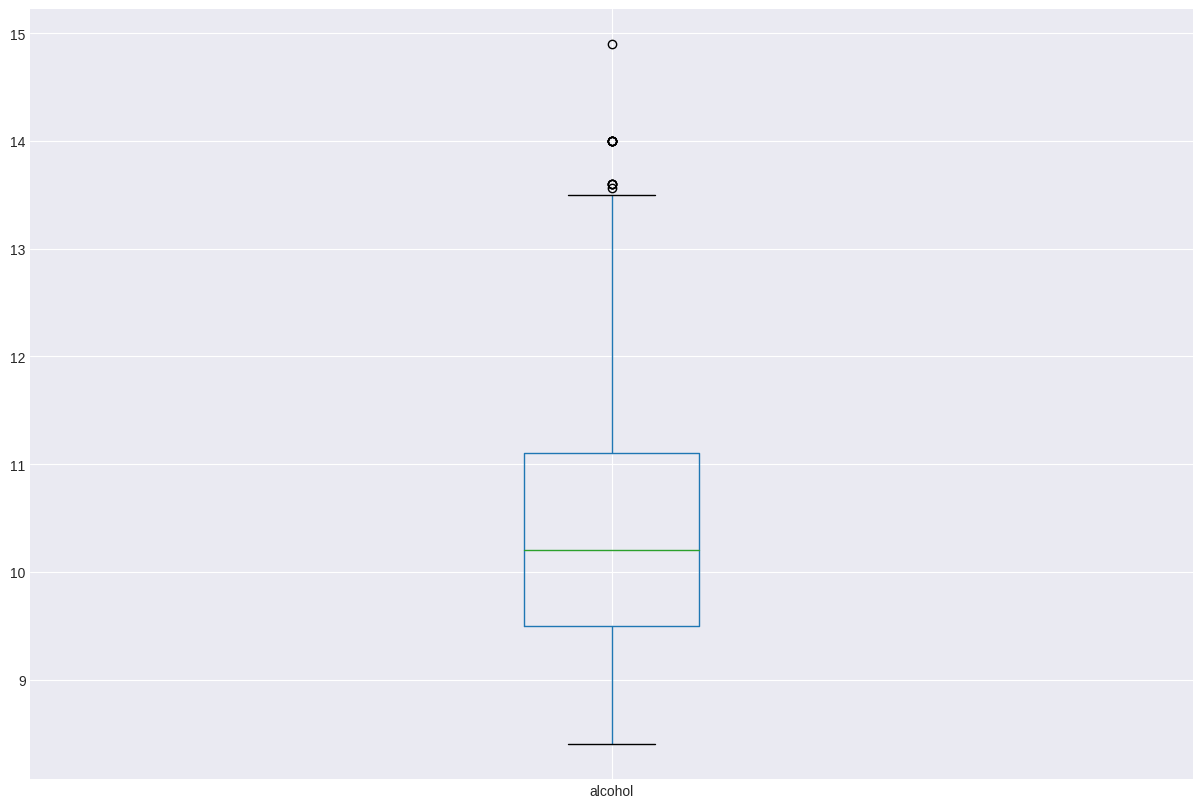

In [ ]:
redwinequality_df.boxplot("alcohol", figsize=(15, 10))
plt.show()

In [ ]:
# Get the median of the alcohol
alc_median = redwinequality_df["alcohol"].median()
alc_median_value = float(alc_median)

# Calculate the interquartile range (IQR)
alc_q1, alc_q3 = np.percentile(redwinequality_df["alcohol"], [25, 75])
alc_iqr = alc_q3 - alc_q1

# Calculate the upper and lower whiskers
alc_upper_whisker = min(redwinequality_df["alcohol"].max(), alc_q3 + 1.5*alc_iqr)
alc_lower_whisker = max(redwinequality_df["alcohol"].min(),alc_q1 - 1.5*alc_iqr)

#Calculate center of the box for visual inspection
alc_center=(alc_q3 +alc_q1)/2

#Print values 
print("Median of alcohol: {:.2f}".format(alc_median_value))
print("Third Quartile: {:.2f}".format(alc_q3))
print("First Quartile: {:.2f}".format(alc_q1))
print("Upper whisker: {:.2f}".format(alc_upper_whisker))
print("Lower whisker: {:.2f}".format(alc_lower_whisker))
print("Center of the box: {:.2f}".format(alc_center))

Median of alcohol: 10.20

Third Quartile: 11.10

First Quartile: 9.50

Upper whisker: 13.50

Lower whisker: 8.40

Center of the box: 10.30


Based on the boxplot of alcohol, it can be seen that there exists outliers outside the upper whisker (13.50); however, none below the lower whisker (8.40). The 'alcohol' column has a typical range of values, also known as the middle 50% of the data, which falls between 9.50 and 11.10.

Moreover, based on visual inspection, the median is near the center of the box; thus, the **distribution is approximately symmetric**.

### 3. Are there any variables that are highly correlated with each other?

In order to know or easily determine which highly correlated with each other the **`corr`** function and heatmap was used again.

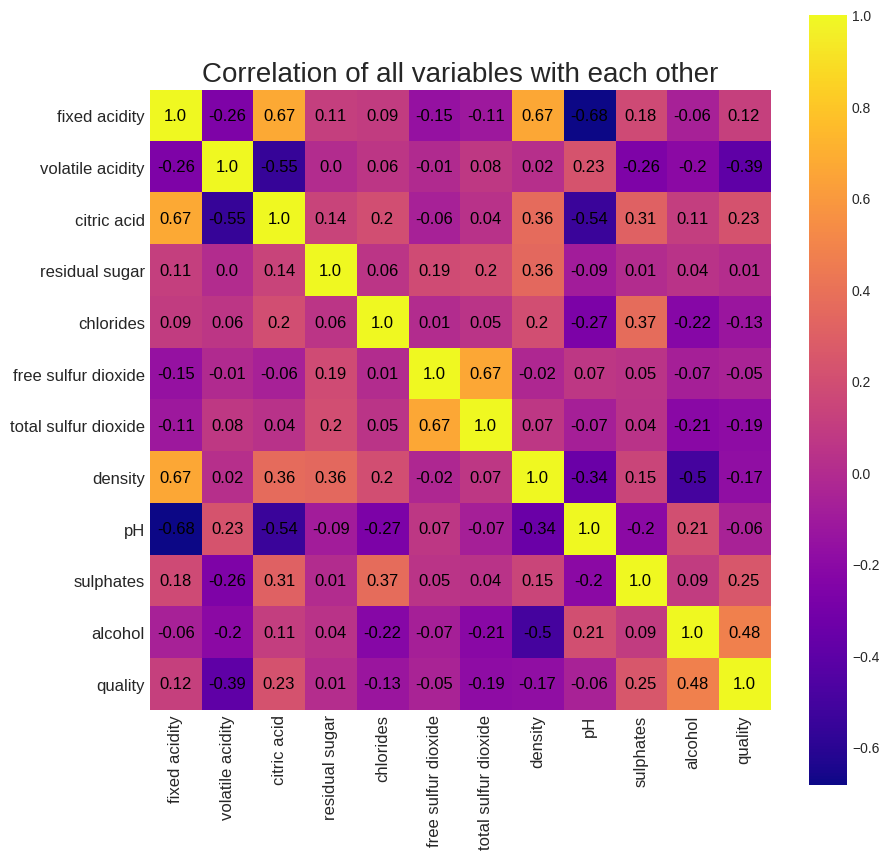

In [ ]:
# pearson correlation between each variable with each other
all_corr = redwinequality_df_standardize.corr(method='pearson')

# Matplotlib heatmap of correlation of each variable with each other
plt.rcParams['axes.grid'] = False # to disable white grid lines
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(all_corr, cmap='plasma', interpolation='nearest')
ax.set_title('Correlation of all variables with each other', size=20)
ax.set_xticks(range(len(all_corr.columns)), all_corr.columns, rotation='vertical', size=12)
ax.set_yticks(range(len(all_corr.columns)), all_corr.columns, size=12)
fig.colorbar(im, orientation='vertical')
for i in range(len(all_corr.columns)):
    for j in range(len(all_corr.columns)):
        text = ax.text(j, i, round(all_corr.iloc[i, j], 2),
                       ha="center", va="center", color="black", size=12)
plt.show()
plt.rcParams['axes.grid'] = True # to enable white grid lines

From the above correlation plot for the given dataset for wine quality estimation, we can easily see which items are related highly with each other, both positively and negatively

The highly positively correlated items are :
1. fixed acidity and citric acid at **0.67**
2. free sulphur dioxide and total sulphor dioxide at **0.67**
3. fixed acidity and density at **0.67**
4. alcohol and quality at **0.48**

The highly negatively correlated items are :
1. citric acid and volatile acidity at **-0.55**
2. fixed acidity and ph at **-0.68**
3. density and alcohol at **-0.5**
4. citric acid and pH at **-0.54**

### 4. How does the alcohol content vary across different quality scores?

In order to observe the how does the *alcohol content* vary across different quality scores, its distribution will be calculated using the sum and difference of its  mean and standard deviation value.

In [ ]:
# alcohol content per quality score
alcohol_per_quality = redwinequality_df.groupby("quality").agg({"alcohol": ["count", "min", "max", "sum", "median", "mean", "std", ]})

# get string representation of sum and difference of mean and standard deviation for distribution column
alcohol_per_quality["alcohol", "distribution"] = round(alcohol_per_quality["alcohol"]["mean"],2).astype(str) + " ± " + round(alcohol_per_quality["alcohol"]["std"],2).astype(str)

round(alcohol_per_quality,2)

alcohol                                                      
          count  min   max      sum median   mean   std  distribution
quality                                                              
3            10  8.4  11.0    99.55   9.93   9.96  0.82   9.96 ± 0.82
4            53  9.0  13.1   544.05  10.00  10.27  0.93  10.27 ± 0.93
5           681  8.5  14.9  6741.70   9.70   9.90  0.74    9.9 ± 0.74
6           638  8.4  14.0  6781.63  10.50  10.63  1.05  10.63 ± 1.05
7           199  9.2  14.0  2281.72  11.50  11.47  0.96  11.47 ± 0.96
8            18  9.8  14.0   217.70  12.15  12.09  1.22  12.09 ± 1.22

The distribution of alcohol per quality rate can be found in the **`distribution`** column of the **`alcohol_per_quality`** dataframe.

The distribution of the **alcohol content** per **quality rate** can be visually represented using boxplots.

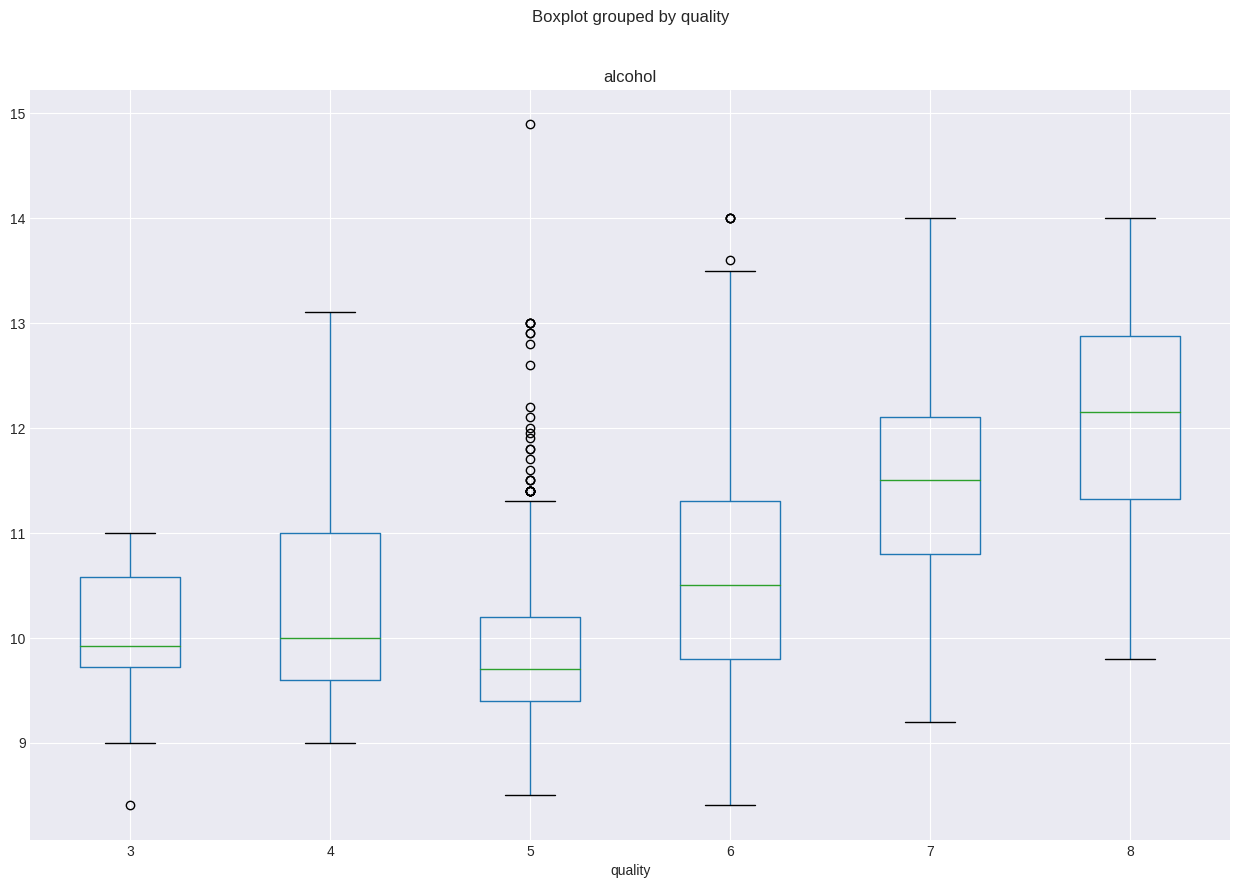

In [ ]:
# boxplot of alcohol content per quality rate
redwinequality_df.boxplot("alcohol", by="quality", figsize=(15, 10))
plt.show()

In order to determine the scewness of alcohol content distribution per quality rate, the **median** (**`50%`**) and **mean** must be retreived. This is done by grouping the **`alcohol`** column by **`quality`** using the **`groupby`** function and calling the **`describe`** function on the **`alcohol`** column.

In [ ]:
bx_vals = redwinequality_df.groupby("quality")["alcohol"].describe()
bx_vals

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,9.955000,0.818009,8.4,9.725,9.925,10.575,11.0
4,53.0,10.265094,0.934776,9.0,9.600,10.000,11.000,13.1
5,681.0,9.899706,0.736521,8.5,9.400,9.700,10.200,14.9
6,638.0,10.629519,1.049639,8.4,9.800,10.500,11.300,14.0
7,199.0,11.465913,0.961933,9.2,10.800,11.500,12.100,14.0
8,18.0,12.094444,1.224011,9.8,11.325,12.150,12.875,14.0


The distribution of **`alcohol`** in a **`quality`** group is negatively skewed if **mean** is greater than the **median**. It is positively skewed if **mean** is less than the **median**. And no skew if **mean** and **median** are both equal.

The list of **`quality`** groups that are negatively skewed are assigned to **`neg-skew`** while the list of **`quality`** groups that are positively skewed are assigned to **`pos-skew`**, and the list of **`quality`** groups that are not skewed are assigned to **`no-skew`**. This can be done using the **`tolist`** function.

In [ ]:
neg_skew = bx_vals.index[bx_vals['mean'] > bx_vals['50%']].tolist()
pos_skew = bx_vals.index[bx_vals['mean'] < bx_vals['50%']].tolist()
no_skew = bx_vals.index[bx_vals['mean'] == bx_vals['50%']].tolist()

print("Negative skew: ", neg_skew)
print("Positive skew: ", pos_skew)
print("No skew: ", no_skew)

Negative skew:  [3, 4, 5, 6]

Positive skew:  [7, 8]

No skew:  []


Based on the results, the **`quality`** groups **`[3, 4, 5, 6]`**'s alcohol distribution is negatively skewed and the **`quality`** groups **`[7, 8]`**'s alcohol distribution is positively skewed. Lastly, there are no **`quality`** groups that are not skewed.

## Formulated Research Question


Our exploratory data analysis tackled all variables that can be measured on how much impact it has to each quality of the wine. The study aims to determine the relationship between the physicochemical properties of wine towards the quality rating of wine. With this, the primary research question aims to focus towards estimating properties that influence the quality rating of wine through modeling the dataset. Thus, our research aims to identify and answer the question:

**Can physicochemical properties of wine estimate its quality rating?**

The relevance of the study primarily focuses on quality assessments in the wine industry. Most traditional systems assess wine quality through human experts which is time consuming and expensive. This project aims to determine which are the best quality red wine indicators and produce insights onto these factors to our model’s red wine quality assessment. This can provide an easier and efficient way to estimate the quality of the wine. Through this, winemakers and consumers would be able to examine how a fine change in each property could affect the quality of the wine. In addition, the system can address the importance of each physiochemical property to identify which factor should be disregarded for reduction of cost.


#### References


Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez (2009)
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal

The importance of the physicochemical composition of wine on the score awarded in an official contest | IVES. (2022, June 13). IVES |. https://ives-openscience.eu/13679/

‌

## Statistical Inference

Statistical methods were used in order to address the research questions of the study. With this, it is important to initially determine the type of data that will be observed which are found in the dataset. The values of the variables would assume a categorical data type despite being represented numerically. The variables for interest would only include values that are whole numbers belonging to a specific range. Hence, the study will use confidence intervals to estimate population parameters with **unpaired T-testing statistical hypothesis test** with a **5% level of significance** and the **confidence level of 95%**. 

Similar procedures were used to systematically present the procedure involved in all hypothesis testing. The categorical variables will serve as the primary basis for grouping the data by its range. Afterwards, the hypotheses will be stated based on each physicochemical properties. The data is then prepared using unpaired t-testing, then the resulting p-value of values less than **0.05** will be obtained and used for conclusions and insights. 

In [ ]:
# for including the columns with significant difference in mean for varying quality scores
included_cols = []

### Relationship of Fixed Acidity and Quality of Wine

The level of significance for this test will be set to 0.05.

Given that the variables for fixed acidity and quality are known to be correlated to each other by **0.12**. We apply the unpaired t test to get the t test statistic and p-value, and examine if what we've observed from the EDA about the two groups has a relationship when estimating the quality of the wine.

#### Data Grouping

In [ ]:
hq_fa = redwinequality_df_standardize[redwinequality_df_standardize["quality"] > 5]["fixed acidity"]
lq_fa = redwinequality_df_standardize[redwinequality_df_standardize["quality"] <= 5]["fixed acidity"]

In order to identify the significant diffence for the fixed acidity content depending on the quality of the wine, we compute for the average values and standard deviations from the dataset.

In [ ]:
mean_hq = hq_fa.mean()
mean_lq = lq_fa.mean()
std_hq = hq_fa.std()
std_lq = lq_fa.std()

print("High-quality mean:", mean_hq)
print("Low-quality mean:", mean_lq)

High-quality mean: 0.08867850262846012

Low-quality mean: -0.10190876310125378


We set up our hypotheses as follows:

$H_0$ (null hypothesis): There is no significant difference between the average of fixed acidity for high-quality and low-quality graded wines.

$H_A$ (alternative hypothesis): There is a significant difference between the average of fixed acidity for high-quality and low-quality graded wines.

#### T-test statistic computation

To confirm whether the difference in the average quality scores of the two groups are statistically significant, we use the  𝑡
 -test and p-value with the **`ttest_ind`** function.

In [ ]:
t_test, p_value = ttest_ind(hq_fa, lq_fa, equal_var=False)

print("t-test:", t_test)
print("p-value:", p_value)

t-test: 3.8622483322298313

p-value: 0.0001168399738420906


We observe with the p-value of `0.00` and a significant level of `0.05`, we reject the null hypothesis and accept the alternative hypothesis. Thus, the data provide that **there is a significant difference between the average of fixed acidity for high-quality and low-quality graded wines.**

In [ ]:
# include fixed acidity
included_cols.append("fixed acidity")

### Relationship of Volatile acidity and Quality of Wine

The level of significance for this test will be set to 0.05.

Given that the variables for volatile acidity and quality are known to be correlated to each other by **-0.39**. Having the least correlated variable with quality. We apply the unpaired t test to get the t test statistic and p-value, and examine if what we've observed from the EDA about the two groups has a relationship when estimating the quality of the wine.

#### Data Grouping

In [ ]:
hq_va = redwinequality_df[redwinequality_df["quality"] > 5]["volatile acidity"]
lq_va = redwinequality_df[redwinequality_df["quality"] <= 5]["volatile acidity"]

In order to identify the significant difference for the volatile acidity content depending on the quality of the wine, we compute for the average values and standard deviations from the dataset.

In [ ]:
mean_hq = hq_va.mean()
mean_lq = lq_va.mean()
std_hq = hq_va.std()
std_lq = lq_va.std()

print("High-quality mean:", mean_hq)
print("Low-quality mean:", mean_lq)

High-quality mean: 0.4741461988304093

Low-quality mean: 0.589502688172043


We then set up our hypotheses as follows:

$H_0$ (null hypothesis): There is no significant difference between the average of volatile acidity for high-quality and low-quality graded wines.

$H_A$ (alternative hypothesis): There is a significant difference between the average of volatile acidity for high-quality and low-quality graded wines.

#### T-test statistic computation

To confirm whether the difference in the average quality scores of the two groups are statistically significant, we use the  𝑡
 -test and p-value with the **`ttest_ind`** function.

In [ ]:
t_test, p_value = ttest_ind(hq_va, lq_va, equal_var=False)

print("t-test:", t_test)
print("p-value:", p_value)

t-test: -13.477521427970297

p-value: 3.480735328877281e-39


We observe with the p-value of `3.48e-39` and a significant level of `0.05`, we reject the null hypothesis and accept the alternative hypothesis. Thus, the data provide that **there is a significant difference between the average of volatile acidity for high-quality and low-quality graded wines.**

In [ ]:
# include volatile acidity
included_cols.append("volatile acidity")

### Relationship of Citric Acid and Quality of Wine

The level of significance for this test will be set to 0.05.

Given that the variables for citric acid and quality are known to be correlated to each other by **0.23**. We apply the unpaired t test to get the t test statistic and p-value, and examine if what we've observed from the EDA about the two groups has a relationship when estimating the quality of the wine.

#### Data Grouping

In [ ]:
hq_ca = redwinequality_df_standardize[redwinequality_df_standardize["quality"] > 5]["citric acid"]
lq_ca = redwinequality_df_standardize[redwinequality_df_standardize["quality"] <= 5]["citric acid"]

In order to identify the significant diffence for the sulphates content depending on the quality of the wine, we compute for the average values and standard deviations from the dataset.

In [ ]:
mean_hq = hq_ca.mean()
mean_lq = lq_ca.mean()
std_hq = hq_ca.std()
std_lq = lq_ca.std()

print("High-quality mean:", mean_hq)
print("Low-quality mean:", mean_lq)

High-quality mean: 0.14839457081519938

Low-quality mean: -0.17053408339649953


We then set up our hypotheses as follows:

$H_0$ (null hypothesis): There is no significant difference between the average of citric acid for high-quality and low-quality graded wines.

$H_A$ (alternative hypothesis): There is a significant difference between the average of citric acid for high-quality and low-quality graded wines.

#### T-test statistic computation

To confirm whether the difference in the average quality scores of the two groups are statistically significant, we use the  𝑡
 -test and p-value with the **`ttest_ind`** function.

In [ ]:
t_test, p_value = ttest_ind(hq_ca, lq_ca, equal_var=False)

print("t-test:", t_test)
print("p-value:", p_value)

t-test: 6.4798996568226706

p-value: 1.2203594771190528e-10


We observe with the p-value of `1.22e-10` and a significant level of `0.05`, we reject the null hypothesis and accept the alternative hypothesis. Thus, the data provide that **there is a significant difference between the average of citric acid for high-quality and low-quality graded wines.**

In [ ]:
# include citric acid
included_cols.append("citric acid")

### Relationship of Residual Sugar and Quality of Wine

The level of significance for this test will be set to 0.05.

Given that the variables for residual sugar and quality are known to be correlated to each other by **0.01**. We apply the unpaired t test to get the t test statistic and p-value, and examine if what we've observed from the EDA about the two groups has a relationship when estimating the quality of the wine.

#### Data Grouping

In [ ]:
hq_rs = redwinequality_df_standardize[redwinequality_df_standardize["quality"] > 5]["residual sugar"]
lq_rs = redwinequality_df_standardize[redwinequality_df_standardize["quality"] <= 5]["residual sugar"]

In order to identify the significant diffence for the residual sugar content depending on the quality of the wine, we compute for the average values and standard deviations from the dataset.

In [ ]:
mean_hq = hq_rs.mean()
mean_lq = lq_rs.mean()
std_hq = hq_rs.std()
std_lq = lq_rs.std()

print("High-quality mean:", mean_hq)
print("Low-quality mean:", mean_lq)

High-quality mean: -0.0020147064524277066

Low-quality mean: 0.0023152876570235272


We then set up our hypotheses as follows:

$H_0$ (null hypothesis): There is no significant difference between the average of residual sugar for high-quality and low-quality graded wines.

$H_A$ (alternative hypothesis): There is a significant difference between the average of residual sugar for high-quality and low-quality graded wines.

#### T-test statistic computation

To confirm whether the difference in the average quality scores of the two groups are statistically significant, we use the  𝑡
 -test and p-value with the **`ttest_ind`** function.

In [ ]:
t_test, p_value = ttest_ind(hq_rs, lq_rs, equal_var=False)

print("t-test:", t_test)
print("p-value:", p_value)

t-test: -0.08647036872338433

p-value: 0.9311034985041354


We observe with the p-value of `0.93` and a significant level of `0.05`, we accept the null hypothesis and reject the alternative hypothesis. Thus, the data provide that **there is no significant difference between the average of residual sugar for high-quality and low-quality graded wines.**

### Relationship of Chlorides and Quality of Wine

The level of significance for this test will be set to 0.05.

Given that the variables for chlorides and quality are known to be correlated to each other by **-0.13**. We apply the unpaired t test to get the t test statistic and p-value, and examine if what we've observed from the EDA about the two groups has a relationship when estimating the quality of the wine.

#### Data Grouping

In [ ]:
hq_c = redwinequality_df[redwinequality_df["quality"] > 5]["chlorides"]
lq_c = redwinequality_df[redwinequality_df["quality"] <= 5]["chlorides"]

In order to identify the significant difference for the chlorides content depending on the quality of the wine, we compute for the average values and standard deviations from the dataset.

In [ ]:
mean_hq = hq_c.mean()
mean_lq = lq_c.mean()
std_hq = hq_c.std()
std_lq = lq_c.std()

print("High-quality mean:", mean_hq)
print("Low-quality mean:", mean_lq)

High-quality mean: 0.08266081871345027

Low-quality mean: 0.09298924731182795


We then set up our hypotheses as follows:

$H_0$ (null hypothesis): There is no significant difference between the average of chlorides for high-quality and low-quality graded wines.

$H_A$ (alternative hypothesis): There is a significant difference between the average of chlorides for high-quality and low-quality graded wines.

#### T-test statistic computation

To confirm whether the difference in the average quality scores of the two groups are statistically significant, we use the  𝑡
 -test and p-value with the **`ttest_ind`** function.

In [ ]:
t_test, p_value = ttest_ind(hq_c, lq_c, equal_var=False)

print("t-test:", t_test)
print("p-value:", p_value)

t-test: -4.286526201544965

p-value: 1.9525371561167637e-05


We observe with the p-value of `1.95e-05` and a significant level of `0.05`, we reject the null hypothesis and accept the alternative hypothesis. Thus, the data provide that **there is a significant difference between the average of chlorides for high-quality and low-quality graded wines.**

In [ ]:
# include chlorides
included_cols.append("chlorides")

### Relationship of Free sulfur dioxide and Quality of Wine

The level of significance for this test will be set to 0.05.

Given that the variables for free sulphur dioxide and quality are known to be correlated to each other by **-0.05**. We apply the unpaired t test to get the t test statistic and p-value, and examine if what we've observed from the EDA about the two groups has a relationship when estimating the quality of the wine.

#### Data Grouping

In [ ]:
hq_fsd = redwinequality_df_standardize[redwinequality_df_standardize["quality"] > 5]["free sulfur dioxide"]
lq_fsd = redwinequality_df_standardize[redwinequality_df_standardize["quality"] <= 5]["free sulfur dioxide"]

In order to identify the significant diffence for the free sulfur dioxide content depending on the quality of the wine, we compute for the average values and standard deviations from the dataset.

In [ ]:
mean_hq = hq_fsd.mean()
mean_lq = lq_fsd.mean()
std_hq = hq_fsd.std()
std_lq = lq_fsd.std()

print("High-quality mean:", mean_hq)
print("Low-quality mean:", mean_lq)

High-quality mean: -0.05759064687049873

Low-quality mean: 0.06618279983101658


We then set up our hypotheses as follows:

$H_0$ (null hypothesis): There is no significant difference between the average of free sulfur dioxide for high-quality and low-quality graded wines.

$H_A$ (alternative hypothesis): There is a significant difference between the average of free sulfur dioxide for high-quality and low-quality graded wines.

#### T-test statistic computation

To confirm whether the difference in the average quality scores of the two groups are statistically significant, we use the  𝑡
 -test and p-value with the **`ttest_ind`** function.

In [ ]:
t_test, p_value = ttest_ind(hq_fsd, lq_fsd, equal_var=False)

print("t-test:", t_test)
print("p-value:", p_value)

t-test: -2.458754653930382

p-value: 0.014052540098877958


We observe with the p-value of `0.01` and a significant level of `0.05`, we reject the null hypothesis and accept the alternative hypothesis. Thus, the data provide that **there is a significant difference between the average of free sulfur dioxide for high-quality and low-quality graded wines.**

In [ ]:
# include free sulfur dioxide
included_cols.append("free sulfur dioxide")

### Relationship of Total sulfur dioxide and Quality of Wine

The level of significance for this test will be set to 0.05.

Given that the variables for total sulfur dioxide and quality are known to be correlated to each other by **-0.19**. We apply the unpaired t test to get the t test statistic and p-value, and examine if what we've observed from the EDA about the two groups has a relationship when estimating the quality of the wine.

#### Data Grouping

In [ ]:
hq_tsd = redwinequality_df[redwinequality_df["quality"] > 5]["total sulfur dioxide"]
lq_tsd = redwinequality_df[redwinequality_df["quality"] <= 5]["total sulfur dioxide"]

In order to identify the significant difference for the total sulfur dioxide content depending on the quality of the wine, we compute for the average values and standard deviations from the dataset.

In [ ]:
mean_hq = hq_tsd.mean()
mean_lq = lq_tsd.mean()
std_hq = hq_tsd.std()
std_lq = lq_tsd.std()

print("High-quality mean:", mean_hq)
print("Low-quality mean:", mean_lq)

High-quality mean: 39.35204678362573

Low-quality mean: 54.645161290322584


We then set up our hypotheses as follows:

$H_0$ (null hypothesis): There is no significant difference between the average of total sulfur dioxide for high-quality and low-quality graded wines.

$H_A$ (alternative hypothesis): There is a significant difference between the average of total sulfur dioxide for high-quality and low-quality graded wines.

#### T-test statistic computation

To confirm whether the difference in the average quality scores of the two groups are statistically significant, we use the  𝑡
 -test and p-value with the **`ttest_ind`** function.

In [ ]:
t_test, p_value = ttest_ind(hq_tsd, lq_tsd, equal_var=False)

print("t-test:", t_test)
print("p-value:", p_value)

t-test: -9.339911206854245

p-value: 3.822616566428606e-20


We observe with the p-value of `3.82e-20` and a significant level of `0.05`, we reject the null hypothesis and accept the alternative hypothesis. Thus, the data provide that **there is a significant difference between the average of total sulfur dioxide for high-quality and low-quality graded wines.**

In [ ]:
# include total sulfur dioxide
included_cols.append("total sulfur dioxide")

### Relationship of Density and Quality of Wine

The level of significance for this test will be set to 0.05.

Given that the variables for density and quality are known to be correlated to each other by **-0.17**. We apply the unpaired t test to get the t test statistic and p-value, and examine if what we've observed from the EDA about the two groups has a relationship when estimating the quality of the wine.

#### Data Grouping

In [ ]:
hq_d = redwinequality_df[redwinequality_df["quality"] > 5]["density"]
lq_d = redwinequality_df[redwinequality_df["quality"] <= 5]["density"]

In order to identify the significant difference for the density content depending on the quality of the wine, we compute for the average values and standard deviations from the dataset.

In [ ]:
mean_hq = hq_d.mean()
mean_lq = lq_d.mean()
std_hq = hq_d.std()
std_lq = lq_d.std()

print("High-quality mean:", mean_hq)
print("Low-quality mean:", mean_lq)

High-quality mean: 0.9964666432748538

Low-quality mean: 0.997068494623656


We then set up our hypotheses as follows:

$H_0$ (null hypothesis): There is no significant difference between the average of density for high-quality and low-quality graded wines.

$H_A$ (alternative hypothesis): There is a significant difference between the average of density for high-quality and low-quality graded wines.

#### T-test statistic computation

To confirm whether the difference in the average quality scores of the two groups are statistically significant, we use the  𝑡
 -test and p-value with the **`ttest_ind`** function.

In [ ]:
t_test, p_value = ttest_ind(hq_d, lq_d, equal_var=False)

print("t-test:", t_test)
print("p-value:", p_value)

t-test: -6.554124593132584

p-value: 7.561697265393993e-11


We observe with the p-value of `7.56e-11` and a significant level of `0.05`, we reject the null hypothesis and accept the alternative hypothesis. Thus, the data provide that **there is a significant difference between the average of density for high-quality and low-quality graded wines.**

In [ ]:
# include density
included_cols.append("density")

### Relationship of pH and Quality of Wine

The level of significance for this test will be set to 0.05.

Given that the variables for pH and quality are known to be correlated to each other by **-0.06**. We apply the unpaired t test to get the t test statistic and p-value, and examine if what we've observed from the EDA about the two groups has a relationship when estimating the quality of the wine.

#### Data Grouping

In [ ]:
hq_ph = redwinequality_df[redwinequality_df["quality"] > 5]["pH"]
lq_ph = redwinequality_df[redwinequality_df["quality"] <= 5]["pH"]

In order to identify the significant difference for the pH content depending on the quality of the wine, we compute for the average values and standard deviations from the dataset.

In [ ]:
mean_hq = hq_ph.mean()
mean_lq = lq_ph.mean()
std_hq = hq_ph.std()
std_lq = lq_ph.std()

print("High-quality mean:", mean_hq)
print("Low-quality mean:", mean_lq)

High-quality mean: 3.3106432748538013

Low-quality mean: 3.3116532258064515


We then set up our hypotheses as follows:

$H_0$ (null hypothesis): There is no significant difference between the average of pH for high-quality and low-quality graded wines.

$H_A$ (alternative hypothesis): There is a significant difference between the average of pH for high-quality and low-quality graded wines.

#### T-test statistic computation

To confirm whether the difference in the average quality scores of the two groups are statistically significant, we use the  𝑡
 -test and p-value with the **`ttest_ind`** function.

In [ ]:
t_test, p_value = ttest_ind(hq_ph, lq_ph, equal_var=False)

print("t-test:", t_test)
print("p-value:", p_value)

t-test: -0.13045267817664055

p-value: 0.896225032105741


We observe with the p-value of `0.90` and a significant level of `0.05`, we accept the null hypothesis and reject the alternative hypothesis. Thus, the data provide that **there is no significant difference between the average of pH for high-quality and low-quality graded wines.**

### Relationship of Sulphates and Quality of Wine

The level of significance for this test will be set to 0.05.

Given that the variables for sulphates and quality are known to be correlated to each other by **0.25**. We apply the unpaired t test to get the t test statistic and p-value, and examine if what we've observed from the EDA about the two groups has a relationship when estimating the quality of the wine.

#### Data Grouping

In [ ]:
hq_s = redwinequality_df_standardize[redwinequality_df_standardize["quality"] > 5]["sulphates"]
lq_s = redwinequality_df_standardize[redwinequality_df_standardize["quality"] <= 5]["sulphates"]

In order to identify the significant diffence for the sulphates content depending on the quality of the wine, we compute for the average values and standard deviations from the dataset.

In [ ]:
mean_hq = hq_s.mean()
mean_lq = lq_s.mean()
std_hq = hq_s.std()
std_lq = lq_s.std()

print("High-quality mean:", mean_hq)
print("Low-quality mean:", mean_lq)

High-quality mean: 0.20336059374899756

Low-quality mean: -0.23370068233251595


We then set up our hypotheses as follows:

$H_0$ (null hypothesis): There is no significant difference between the average of sulphates for high-quality and low-quality graded wines.

$H_A$ (alternative hypothesis): There is a significant difference between the average of sulphates for high-quality and low-quality graded wines.

#### T-test statistic computation

To confirm whether the difference in the average quality scores of the two groups are statistically significant, we use the  𝑡
 -test and p-value with the **`ttest_ind`** function.

In [ ]:
t_test, p_value = ttest_ind(hq_s, lq_s, equal_var=False)

print("t-test:", t_test)
print("p-value:", p_value)

t-test: 8.853056052990738

p-value: 2.3577177008758307e-18


We observe with the p-value of `2.36e-18` and a significant level of `0.05`, we reject the null hypothesis and accept the alternative hypothesis. Thus, the data provide that **there is a significant difference between the average of sulphates for high-quality and low-quality graded wines.**

In [ ]:
# include sulphates
included_cols.append("sulphates")

### Relationship of Alcohol and Quality of Wine

The level of significance for this test will be set to 0.05.

Given that the variables for alcohol and quality are known to be correlated to each other by **0.48**. We apply the unpaired t test to get the t test statistic and p-value, and examine if what we've observed from the EDA about the two groups has a relationship when estimating the quality of the wine.

The dataframes that will be grouped under the interest of high quality and low quality wines are initialized. A high quality wine is considered to have a rating of more than 5, while the low quality wine is considered to have a rating of less than or equal to 5. 

In [ ]:
hq = redwinequality_df_standardize[redwinequality_df_standardize["quality"] > 5]["alcohol"]
lq = redwinequality_df_standardize[redwinequality_df_standardize["quality"] <= 5]["alcohol"]

In order to identify the significant diffence for the alcohol content depending on the quality of the wine, we compute for the average values and standard deviations from the dataset.

In [ ]:
mean_hq = hq.mean()
mean_lq = lq.mean()
std_hq = hq.std()
std_lq = lq.std()

print("High-quality mean:", mean_hq)
print("Low-quality mean:", mean_lq)

High-quality mean: 0.4054229786840064

Low-quality mean: -0.4659094714715394


We set up our hypotheses as follows:

$H_0$ (null hypothesis): There is no significant difference in the average alcohol content of high-quality and low-quality graded wines.

$H_A$ (alternative hypothesis): There is a significant difference in the average alcohol content of high-quality and low-quality graded wines.

#### T-test statistic computation

To confirm whether the difference in the average quality scores of the two groups are statistically significant, we use the  𝑡
 -test and p-value with the **`ttest_ind`** function.

In [ ]:
t_test, p_value = ttest_ind(hq, lq, equal_var=False)

print("t-test:", t_test)
print("p-value:", p_value)

t-test: 19.78218499094005

p-value: 1.1394849792947967e-77


Results of the $t$-test will tell us whether to accept or reject our hypothesis. With a p-value of `1.14e-10` and a significant level of `0.05`, we reject the null hypothesis and accept the alternative hypothesis. Thus, the data provide that **there is a statistically significant difference in the average alcohol content of high-quality and low-quality graded wines.**

In [ ]:
# include alcohol
included_cols.append("alcohol")

### Columns that have a significant difference between the average of each physicochemical properties for high-quality and low-quality graded wines 

Here are the variables that showed significant difference when it comes to their quality rating.

In [ ]:
included_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']

## Data Modelling

To answer the research question, the data modelling that is appropriate would be the recommender system -- specifically the item-item collaborative filtering. 
The columns or variables with significant difference with their means when it comes their quality rating that was determined from the previous section, Statistical Inference,
is going to be used in the said model.

In [ ]:
included_cols.append("quality")
train_df = redwinequality_df[included_cols]

The item-item collaborative filtering is implemented as a class **`IICollabFiltering`** in the **`ii_collab_filtering.py`**.
The class is going to be imported in order to perform the recommender system.

In [ ]:
from ii_collab_filtering import IICollabFiltering

An **`IICollabFiltering`** object is going to be instantiated with `k` equal to `3`. The parameter `k` indicates the number of similar items that we need to consider in giving similar recommendations.

In [ ]:
iicfilter = IICollabFiltering(3)

To provide proof that the model is working. The first wine item at the last index `1598` of the dataset is going to be used to check if the data model could estimate the wine quality.

In [ ]:
wine_1598 = train_df.iloc[1598].copy()
orig_rating_1598 = wine_1598["quality"]
wine_1598.loc["quality"] = np.nan
print(wine_1598)

train_df = train_df.drop(1598, inplace=False)
train_df

fixed acidity            6.00000

volatile acidity         0.31000

citric acid              0.47000

chlorides                0.06700

free sulfur dioxide     18.00000

total sulfur dioxide    42.00000

density                  0.99549

sulphates                0.66000

alcohol                 11.00000

quality                      NaN

Name: 1598, dtype: float64


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,0.068,28.0,38.0,0.99651,0.82,9.5,6
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,0.75,11.0,6


Row mean of `wine_1598` and `train_df` are going to be computed using the `get_row_mean()` function.

In [ ]:
rmean = iicfilter.get_row_mean(wine_1598)
train_row_mean = iicfilter.get_row_mean(train_df)

print("Row mean of wine_0: {:.2f}".format(rmean))
print("Row mean of train_df:")
train_row_mean.round(2)

Row mean of wine_0: 8.83

Row mean of train_df:


0        6.91
1       11.73
2        9.41
3       10.65
4        6.91
        ...  
1593     9.09
1594    10.00
1595    11.56
1596     9.48
1597     9.96
Length: 1598, dtype: float64

The row means are going to be normalized by calling the `noramlize_data()` function.

In [ ]:
normalized_wine_1598 = iicfilter.normalize_data(wine_1598, rmean)
print(normalized_wine_1598)
normalized_train_df = iicfilter.normalize_data(train_df, train_row_mean)
normalized_train_df.round(2)

fixed acidity           -2.83361

volatile acidity        -8.52361

citric acid             -8.36361

chlorides               -8.76661

free sulfur dioxide      9.16639

total sulfur dioxide    33.16639

density                 -7.83812

sulphates               -8.17361

alcohol                  2.16639

quality                      NaN

Name: 1598, dtype: float64


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.49,-6.21,-6.91,-6.84,4.09,27.09,-5.92,-6.35,2.49,-1.91
1,-3.93,-10.85,-11.73,-11.63,13.27,55.27,-10.73,-11.05,-1.93,-6.73
2,-1.61,-8.65,-9.37,-9.32,5.59,44.59,-8.42,-8.76,0.39,-4.41
3,0.55,-10.37,-10.09,-10.57,6.35,49.35,-9.65,-10.07,-0.85,-4.65
4,0.49,-6.21,-6.91,-6.84,4.09,27.09,-5.92,-6.35,2.49,-1.91
...,...,...,...,...,...,...,...,...,...,...
1593,-2.29,-8.47,-9.01,-9.02,18.91,28.91,-8.09,-8.27,0.41,-3.09
1594,-3.80,-9.40,-9.92,-9.91,22.00,34.00,-9.01,-9.42,0.50,-5.00
1595,-5.66,-11.01,-11.46,-11.49,27.44,39.44,-10.56,-10.80,-0.36,-5.56
1596,-3.18,-8.97,-9.35,-9.40,19.52,30.52,-8.48,-8.73,1.52,-3.48


After getting the row means, the cosine similarity would be computed for to see which item rows are similar to each other. This is going to be done using the `get_cosine_similarity()` function. First, it must be tested on the wine to be estimated to see if the similarity function is working well.

In [ ]:
sim_wine_1598 = iicfilter.get_cosine_similarity(wine_1598, wine_1598)
print("Similarity of wine_0 to itself: ", sim_wine_1598)

Similarity of wine_0 to itself:  0.9999999999999998


It is evident that the wine is similar to itself. Next would be checking the similarity of red wine `1598` to red wine `1`.

In [ ]:
sim_1598_1 = iicfilter.get_cosine_similarity(wine_1598, train_df.iloc[1])
print("Similarity of wine_0 to wine_1: ", sim_1598_1)

Similarity of wine_0 to wine_1:  0.9913538857478337


Base on the result of cosine similarity. It shows that the wine `1598` and wine `1` are strongly similar to each other with a `0.99` similarity.

To further check, the similarity of wine `1598` with wines `6` to `10` is going to be computed.

In [ ]:
sim_1598_others = iicfilter.get_cosine_similarity(normalized_wine_1598, normalized_train_df.iloc[5:10])
print("Similarity of wine_0 to other wines (from 6 to 10):")
sim_1598_others.round(2)

Similarity of wine_0 to other wines (from 6 to 10):


5    0.99
6    0.98
7    0.95
8    0.94
9    0.95
dtype: float64

Once the similarity of wine `1598` to the other wine items has been computed. Then only the `k` most similary would be picked. This is done by calling the `get_k_similar()` function.

In [ ]:
similar_wines = iicfilter.get_k_similar(normalized_train_df, normalized_wine_1598)
print(similar_wines[1].round(2))

1535    1.0

569     1.0

571     1.0

dtype: float64


According to the results, the wine `1535`, `569`, and `571` are the `k` most similar wines to wine `0`. With this, the rating can be computed or estimated with the help of the `quality` rating values of the `k` most similar wines. This can be done by calling the `get_rating()` function. 

In [ ]:
predict_rating_1598 = iicfilter.get_rating(train_df,wine_1598)
print("Estimated rating of wine_0: {:.2f}".format(predict_rating_1598))

Estimated rating of wine_0: 6.00


The model was able to estimate that the quality rating wine `1598` given its pyhsicochemical properties is **`6`**. To further check, it will be compared to the original rating of wine `1598`.

In [ ]:
print("Original rating of wine_1598 == Estimated rating of wine_1598: ", orig_rating_1598 == predict_rating_1598)

Original rating of wine_1598 == Estimated rating of wine_1598:  True


Based on the comparison of the original and estimated value, they are both equal. It can be safely assumed that the model is accurate on its estimations.

To further the test, a sample new wine will be instantiated. Its physicochemical values are similar to the wine at index 0 of **`redwinequality_df`** with slight difference on the physicochemical property values.

In [ ]:
new_wine = pd.DataFrame({
    'fixed acidity': [7.1],
    'volatile acidity': [0.0],
    'citric acid': [0.0],
    'chlorides': [0.07],
    'free sulfur dioxide': [10],
    'total sulfur dioxide': [35],
    'density': [0.998],
    'sulphates': [0.57],
    'alcohol': [9.5],
})

In [ ]:
predicted_rating = iicfilter.get_rating(train_df, new_wine)
print("Estimated rating of new wine: ", predicted_rating)

Estimated rating of new wine:  5


The model was able to successfully estimate the rating of the new red wine whose physicochemical properties are similar or close to the wine at index `0`. 

To provide a deeper analysis of the model's accuracy in calculating wine quality, we will be applying it to a randomly selected sample of 100 wines from the dataset. This will help us evaluate the model's performance on a subset of the data and provide a more comprehensive understanding of its capabilities.

In [ ]:
random_wines = train_df.sample(n=100, random_state=1)

count = 0

for index, wine in random_wines.iterrows():
    orig_rating = wine["quality"]
    wine.loc["quality"] = np.nan
    if index in train_df.index:  # Check if index exists in train_df
        train_df = train_df.drop(index).reset_index(drop=True)  # reset index after dropping row

    # Calculate estimated rating
    estimate_rating = iicfilter.get_rating(train_df, wine)

    # Compare estimated rating to original rating
    if estimate_rating == orig_rating:
        count += 1

# Compute accuracy of estimations
accuracy = count / len(random_wines)

# Print accuracy of estimations
print(f"Accuracy of estimations for 100 random wines: {accuracy}")

Accuracy of estimations for 100 random wines: 0.41


As we ran the code, the accuracy of the model ranges from 0.4 to 0.5. The lower accuracy might be due to the fact that we dropped 100 data from the dataset, which reduces the number of data points that the collaborative filtering algorithm can use to find similar wines. In contrast, when we drop only one data point and compare it to the remaining wines, the algorithm still has a relatively large pool of data to draw from. Hence, the accuracy might be lower when we drop more data points as it reduces the number of possible similar wines that the algorithm can identify.

## Insights and Conclusion


The objective of this project was to investigate whether physicochemical properties of wine could estimate its quality rating. To achieve this, the study conducted a statistical inference test of unpaired t-test on 10 physicochemical properties of wine. Each property was categorized as low quality if less than or equal to 5 and high quality if greater than 5, and a null hypothesis was established for each property that there is no significant difference between the average of the property for high-quality and low-quality graded wines. The alternative hypothesis was found to be true for the following physicochemical properties: `fixed acidity`,` volatile acidity`, `citric acid`, `chlorides`, `free sulfur dioxide`, `total sulfur dioxide`, `density`, `sulphates`, and `alcohol`. **These properties significantly influenced the quality of wine**, with **p-values less than 0.05**.

For data modeling, the recommender system was used, specifically the **item-item collaborative filtering**. The study extracted an observation from wine #1598, where normalization was conducted, row mean was obtained, and similarity was calculated. With the mentioned processes, the **model estimated the wine quality**, which was then compared to the actual wine quality of wine #1598 in the original data, and they were **found to be equivalent** 

Moreover, a new sample wine was created, with physicochemical values similar to the wine at index 0 of the original dataset, but with slight differences in property values. The model successfully estimated the rating of the new wine, whose physicochemical properties were similar or close to the wine at index 0.

Furthermore, the model's accuracy ranged from 0.4 to 0.5 when tested on 100 randomly selected wines due to the reduced number of data points for collaborative filtering to find similar wines. However, when dropping only one data point, the accuracy remained relatively high, likely because the algorithm still had a large pool of data to draw from.

The study used hypothesis testing to identify the physicochemical properties that influence wine quality and used them as properties in the data modeling. Therefore, the implementation of both hypothesis testing and data modeling supports the conclusion that the **physicochemical properties of wine can be used to estimate its quality rating**.
